## Natural Language Processing with Disaster Tweets Dataset

### Introduction

Twitter has grown to be a crucial communication tool during emergencies. Smartphones are so common that anyone can instantly report an emergency they are witnessing. As a result, more organisations are interested in automating Twitter monitoring.

### Brief about dataset

The Dataset Contain Three csv files:
- train
- test
- sample_submission

Also it Contains Four Columns which are:
- The text of a tweet
- A keyword from that tweet (although this may be blank!)
- The location the tweet was sent from (may also be blank!)
- target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)


🎯 Goal: The objective of this notebook is to build a model that predicts which Tweets are real disasters and which are not.

The Notebook seeks to compare the performance of Machine Learning Models and Deep Learning Models and determine the most accurate one for this task. It also presents text pretreatment techniques used in Natural Language Processing (NLP) at a single point for better comprehension.

### Why do we perform text preprocessing

Machine learning models can only interpret numerical numbers, They cannot comprehend text in its natural form. Therefore, all textual information must be represented using numerical values. Additionally, textual information derived from natural language may contain noise and must be cleaned, for as by deleting stopwords and other meaningless text elements.


#### Methods used for Text Preprocessing

- Lower Casing
- Remove HTML Tags
- Contractions Expansion
- Twitter Mention Removal
- Remove URLs
- Remove Email IDs
- Handling Diacritics
- Removing Unicode Characters
- Handling Digits or Words with Digits
- Handling Currency
- Handling Abbreviations
- Removing Brackets
- Filtering Words that represent Emotions
- Replacing Logical Operators in Text
- Removing Proper Nouns
- Handling Compound Words
- Handling Idioms and Figurative Language
- Spell Checking
- Handling Emojis
- Remove Stopwords
- Remove Extra Spaces
- Stemming or Lemmatization

Each method is briefly described in the subsections, and the order of these preprocessing procedures is reviewed at the conclusion. Here is a combined function with all the preprocessing stages stated if you just want to copy it and use it in your code. You can remove the lines for the steps you don't want to do and rearrange the steps in the order necessary.

### Libraries Used

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import contractions
import spacy
import nltk
import itertools
from textblob import TextBlob
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from unidecode import unidecode
from bs4 import BeautifulSoup
from spellchecker import SpellChecker
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, Bidirectional, LSTM, Dense, Conv1D, Input, BatchNormalization, Embedding, SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")
#from keras.utils import plot_model

### Data Review

In [2]:
# reading data from device
df = pd.read_csv('train.csv', sep=",", encoding="utf-8")
df_train = pd.read_csv("train.csv", sep=",", encoding="utf-8")
df_test = pd.read_csv("test.csv", sep=",", encoding="utf-8")

df_train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [3]:
# getting the dataset's rows and columns by invoking the shape() function
print("The Dimensions of the train data ",df_train.shape)
print("---"*25)
print("The Dimensions of the test data ",df_test.shape)

The Dimensions of the train data  (7613, 5)
---------------------------------------------------------------------------
The Dimensions of the test data  (3263, 4)


In [4]:
# getting information about columns using info() function
print("Train Data:\n")
print(df_train.info())
print("\nTest Data:\n")
print(df_test.info())

Train Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None

Test Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


In [5]:
#Check types for all the columns using dtypes
print("Train Data:\n")
print(df_train.dtypes)
print("\nTest Data:\n")
print(df_test.dtypes)

Train Data:

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

Test Data:

id           int64
keyword     object
location    object
text        object
dtype: object


In [6]:
# getting statistical information for every column in dataset by iterating over the columns by a for loop and getting these data using describe() function
print("Train Data:\n")

for column in df_train.columns:
    print(df_train[column].describe())
    print("\n----------------------------\n")

print("Test Data:\n")

for column in df_test.columns:
    print(df_test[column].describe())
    print("\n----------------------------\n")

Train Data:

count     7613.000000
mean      5441.934848
std       3137.116090
min          1.000000
25%       2734.000000
50%       5408.000000
75%       8146.000000
max      10873.000000
Name: id, dtype: float64

----------------------------

count           7552
unique           221
top       fatalities
freq              45
Name: keyword, dtype: object

----------------------------

count     5080
unique    3341
top        USA
freq       104
Name: location, dtype: object

----------------------------

count                                                  7613
unique                                                 7503
top       11-Year-Old Boy Charged With Manslaughter of T...
freq                                                     10
Name: text, dtype: object

----------------------------

count    7613.00000
mean        0.42966
std         0.49506
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         1.00000
Name: target, dtype: float64

---

In [7]:
# trying to know if there is any cell in the sheet that doesn't contain any value by using isnull() and any() functions if there is the output will be true false otherwise
print("Train Data:\n")
print(df_train.isnull().any())
print("\nTest Data:\n")
print(df_test.isnull().any())

Train Data:

id          False
keyword      True
location     True
text        False
target      False
dtype: bool

Test Data:

id          False
keyword      True
location     True
text        False
dtype: bool


##### There's some data missing in the Columns ( Keyword and Location ) in Both Train and Test files but how many ?

In [8]:
# Counting number of missing values using sum() function
print("Train Data:\n")
print(df_train.isnull().sum())
print("\nTest Data:\n")
print(df_test.isnull().sum())

Train Data:

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Test Data:

id             0
keyword       26
location    1105
text           0
dtype: int64


##### 61 cells missing in keyword column and 2533 in location ( train file )
##### 26 cells missing in keyword column and 1105 in location ( test file )

#### We won't use this column when evaluating the model

In [9]:
#checking duplicates
print("Train Data:", df_train.duplicated().sum())
print("\nTest Data:", df_test.duplicated().sum())

Train Data: 0

Test Data: 0


##### No duplicates are found in both files

### Decoding

In [10]:
df_train['target'] = df_train['target'].replace([0,1],['Normal Tweet','Disaster Tweet'])

In [11]:
df_train.target.value_counts()

Normal Tweet      4342
Disaster Tweet    3271
Name: target, dtype: int64

### EDA & Visualization

<AxesSubplot:ylabel='target'>

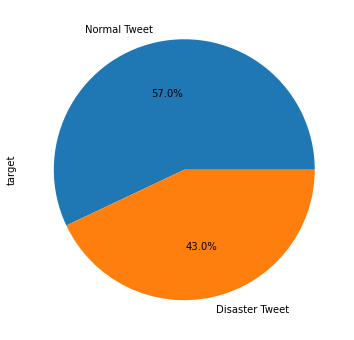

In [12]:
plt.figure(figsize=(8,6))
round(df_train["target"].value_counts()/df_train.shape[0]*100,2).plot.pie(autopct= '%2.1f%%')

<AxesSubplot:title={'center':'Target Distribution'}, xlabel='target', ylabel='count'>

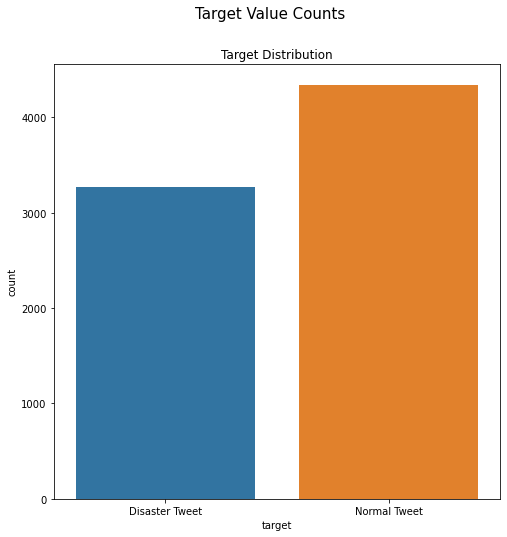

In [13]:
# Visualizing target values
plt.figure(figsize=(8,8))
plt.title('Target Distribution')
plt.suptitle("Target Value Counts", fontsize=15)
sns.countplot(x='target', data=df_train)

<AxesSubplot:title={'center':'Top 20 Keywords'}, xlabel='keyword'>

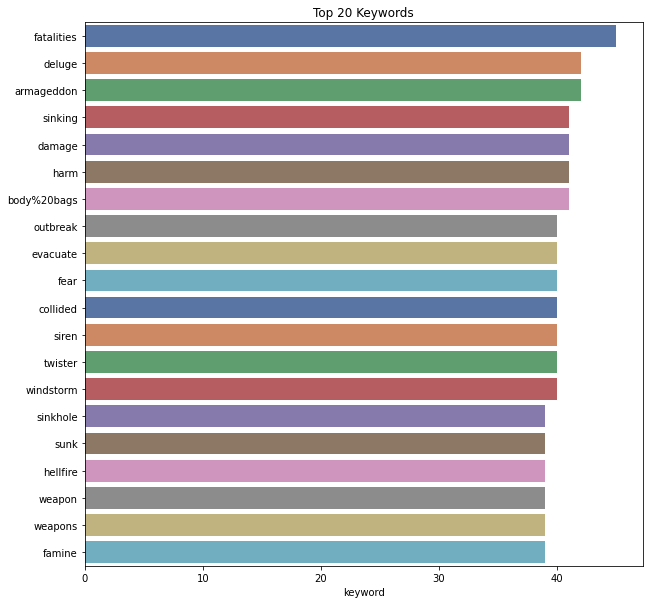

In [14]:
# TOP 20 KEYWORDS
words=df_train['keyword'].value_counts()[:20]
plt.figure(figsize=(10,10))
plt.title("Top 20 Keywords")
plt.xlabel("Count of Keywords")
sns.barplot(x=words,y=words.index,palette='deep')

In [15]:
# creating new column for storing length of reviews 
df_train['Length_Before_Processing'] = df_train['text'].apply(len)
df_test['Length_Before_Processing'] = df_test['text'].apply(len)

df_train.head()

,id,keyword,location,text,target,Length_Before_Processing
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Disaster Tweet,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Disaster Tweet,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,Disaster Tweet,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",Disaster Tweet,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Disaster Tweet,88


array([<AxesSubplot:title={'center':'Disaster Tweet'}>,
       <AxesSubplot:title={'center':'Normal Tweet'}>], dtype=object)

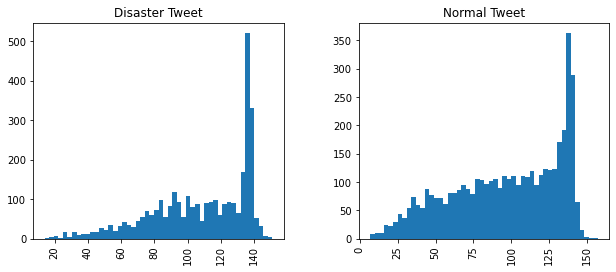

In [16]:
df_train.hist(column='Length_Before_Processing', by='target', bins=50,figsize=(10,4))

#### The more characters the tweet has the more likely to be a disaster tweet.

### Data Preprocessing

In [17]:
df_train.text.duplicated().sum()

110

In [18]:
df_test.text.duplicated().sum()

20

##### There is a 100 tweet duplicated in the train data with different values in target also 20 records in the test data

In [19]:
# dropping duplicates in tweets
df_train.drop_duplicates(subset=["text"], inplace=True)
df_test.drop_duplicates(subset=["text"], inplace=True)

In [20]:
print(df_train.text.duplicated().sum())
print(df_test.text.duplicated().sum())

0
0


#### Now there is only unique tweets in the dataframe

In [21]:
df_train.head(10)

,id,keyword,location,text,target,Length_Before_Processing
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Disaster Tweet,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Disaster Tweet,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,Disaster Tweet,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",Disaster Tweet,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Disaster Tweet,88
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,Disaster Tweet,110
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,Disaster Tweet,95
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,Disaster Tweet,59
8,14,NaN,NaN,There's an emergency evacuation happening now ...,Disaster Tweet,79
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,Disaster Tweet,52


In [22]:
df_test.head(10)

,id,keyword,location,text,Length_Before_Processing
0,0,NaN,NaN,Just happened a terrible car crash,34
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",64
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",96
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,40
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,45
5,12,NaN,NaN,We're shaking...It's an earthquake,34
6,21,NaN,NaN,They'd probably still show more life than Arse...,72
7,22,NaN,NaN,Hey! How are you?,17
8,27,NaN,NaN,What a nice hat?,16
9,29,NaN,NaN,Fuck off!,9


In [23]:
print(df_train.shape)
print(df_test.shape)

(7503, 6)
(3243, 5)


#### Handling Same Locations in the dataset as there is multiple names for the same location

In [24]:
for location in df_train.location:
    print(location)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Birmingham
Est. September 2012 - Bristol
AFRICA
Philadelphia, PA
London, UK
Pretoria
World Wide!!
nan
Paranaque City
Live On Webcam
nan
milky way
nan
nan
nan
GREENSBORO,NORTH CAROLINA
nan
England.
Sheffield Township, Ohio
India
Barbados
Anaheim
Abuja
USA
South Africa
Sao Paulo, Brazil
hollywoodland 
Edmonton, Alberta - Treaty 6
nan
Inang Pamantasan
Twitter Lockout in progress
Concord, CA
Calgary, AB
Birmingham
San Francisco
CLVLND
Nashville, TN
Santa Clara, CA
UK
St. Louis, MO
Walker County, Alabama
Australia
North Carolina
nan
Norf Carolina
San Mateo County, CA
North Carolina
Njoro, Kenya
nan
Your Sister's Bedroom
nan
Arlington, TX
South Bloomfield, OH
nan
New Hanover County, NC
Maldives
Manchester, NH
Wilmington, NC
nan
New Hanover County, NC
nan
global
Alberta | Sask. | Montana
Charlotte
Baton Rouge, LA
Hagerstown, MD
Gloucestershire , UK
nan
UK
Nairobi, Kenya


REPUBLICA DOMINICANA
nan
nan
FOLLOWS YOU everywhere you go
Birmingham
-?s?s?j??s-
London
nan
nan
Indonesia

The Meadow
Bournemouth
Brum/Lestah 
Dorset, UK
nan
Chester 
nan
nan
Banbridge
Port Orange, FL
nan
probably petting an animal
Chicago, IL
nan
Varies 
ACCRA GHANA
Columbus
nan
St Joseph de Beauce
nan
Wasington, DC
uk
Seattle
  News
nan
Newport, Wales, UK
nan
nan
United States
iTunes - RSS
contactSimpleNews@gmail.com
nan
Washington, DC
Upper manhattan, New York
Las Vegas, Nevada
Victoria, British Columbia
Vancouver BC
Devon/London 
Brasil
ITALY
Atlanta g.a.
nan
nan
EVERYWHERE
Washington DC
Denver, CO
nan
nan
Washington DC
Mount Vernon, NY
nan
Jackson TN
Los Angeles, London, Kent
USA, Haiti, Nepal
Portoviejo-Manabi-Ecuador
nan
nan
chillin at ceder rapids
nan
Manila, Philippines
en el pais de los arrechos
nan
Nigeria
nan
San Francisco
Hinton, W.Va.
nan
Philadelphia, PA USA
nan
Naperville
nan
Lima, Peru
In Your Notifications 
nan
Fort Worth, Texas
Dappar (Mohali) Punjab
nan
London
los 

Wood Buffalo, Alberta
ÌÏT: 10.614817868480726,12.195582811791382
nan
Anchorage, AK
Nakhon Si Thammarat
Somewhere with Clyde
Buffalo, NY
Quincy
Winnipeg
Fresno, CA
Laredo, TX
New South Wales, Australia
nan
Poconos
Sacramento, CA
Haddonfield, NJ
Southern California
nan
Jaipur, Rajasthan, India
??? ???? ??????
nan
Also follow ?
nan
Play For Ryan ??
nan
nan
In the potters hands
nan
nan
New York
New York City ,NY
nan
Corpus Christi, Texas
Cape Town
nan
Wolverhampton/Brum/Jersey
Chamblee, Georgia
Official Website
#WashingtonState #Seattle
TechFish 
Washington, DC & Charlotte, NC
nan
United States where it's warm
nan
Washington, DC
Hope Road, Jamaica 
jersey 
nan
WestEnd, Puritan Ave 
nan
Youngstown, OH
nan
Nantes, France
St. John's, NL, Canada
Caserta-Roma, Italy 
Pekanbaruå¡Batam Islandå¡Medan
oman muscat al seeb 
San Francisco
Wisconsin
nan
Jogja, Indonesia Slowly Asia
Vancouver BC
nan
USA
nan
Avon, OH
nan
The North
Philadelphia, PA
Just Happy to Be Anywhere
nan
Lima, Ohio
Ireland
Lowell, 

Canada
NY
ill yorker
Newcastle
Above the snake line - #YoNews
White Plains, NY
nan
B&B near Alton Towers
nan
Alger-New York-San Francisco
nan
nan
Êwagger!ÌominicanÌ÷
Haddonfield, NJ
USA
nan
hell
Texas af
San Diego California 92101
San Diego, CA
Hinterestland
Evansville, IN
Greenpoint
In the potters hands
Haddonfield, NJ
ÌÏT: 42.910975,-78.865828
Newcastle
nan
San Diego, CA
nan
nan
Cypress, CA 90630
Sacramento
nan
Vancouver, British Columbia
nan
North East Unsigned Radio
Every Where in the World
Memphis
nan
nan
nan
nan
nan
Fountain Valley, CA
Canada
nan
nan
nan
Michigan, USA
nan
Sacramento, CA
Liverpool
Haarlem
nan
Queensland
HOMRA.
nan
Ciudad AutÌ_noma de Buenos Aires, Argentina
nan
Not where I want to be, yet
London
Duval, WV 25573, USA ?
nan
nan
London
Rhyme Or Reason?
hey Georgia
Coventry
nc
nan
kenya
My subconscious
London
 New England
nan
nan
UAE,Sharjah/ AbuDhabi
Tampa, FL
New York
The Web
Paris.
Am International
Team Slytherin
Michel Delving.
Hame
Brizzle City !
nan
???  Dream

Houston, TX
Ely, Cambridgeshire
nan
GrC Founder, 8,000 Subscribers
Beirut/Toronto
Los Angeles 
nan
England
Incognito
nan
Regalo Island
nan
nan
california | oregon | peru |
N. California USA
Multinational *****
nan
rural ohio (fuck)
??????
West
Vermont, USA
nan
Hawthorne, NE
nan
??? ?????????????
Rocky Mountains
( ?å¡ ?? ?å¡), 
nan
Kernow
nan
London
Nottingham, England
California
The Netherlands
St. Louis
Holly, MI
Somewhere between here & there
CHICAGO
Frostburg
nan
Thailand
Canterbury kent
nan
The Sun's Corona
140920-21 & 150718-19 BEIJING
London
World
Harbour Heights, FL
New York
Sheff/Bangor/Salamanca/Madrid
Stamford & Cork (& Shropshire)
nan
140920-21 & 150718-19 BEIJING
#KaumElite;#F?VOR;#SMOFC
Orlando, FL
Nairobi, Kenya
Richardson TX
nan
London, Sydney
Las Vegas
nan
Internet
Florida
Pittsburgh
Where I Need To Be
Here, unless there.  
Manchester
NEPA/570
nan
pettyville, usa
Phila.
brooklyn, NYC
Atlanta - FAU class of '18
Bristol, England
Houston
Twitterville
nan
Eastern Iowa
Los A

In [25]:
print(df_train.location)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7604    NaN
7605    NaN
7606    NaN
7608    NaN
7612    NaN
Name: location, Length: 7503, dtype: object


#### Replacing Some of Location values to its proper name.

In [26]:
def cleanLocation(dataframe, search_word, replace_with = '', rate = 70):
    replace_with = replace_with if replace_with else search_word
    
    matches = process.extract(search_word, dataframe["location"].unique(), limit= dataframe.shape[0])
    for pmatch in matches:
        if pmatch[1] >= rate:
            dataframe.loc[dataframe["location"] == pmatch[0], "location"] = replace_with

In [27]:
cleanLocation(df_train, "NYC","New York City")
cleanLocation(df_train, "Worldwide")
cleanLocation(df_train, "United States","USA")
cleanLocation(df_train, "United Kingdom","UK")
cleanLocation(df_train, "England","UK")
cleanLocation(df_train, "San Francisco, CA","San Francisco")
cleanLocation(df_train, "Washington, D.C., ","Washington, DC")
cleanLocation(df_train, "London","London")
cleanLocation(df_train, "Earth")
cleanLocation(df_train, "nan")


cleanLocation(df_test, "NYC","New York City")
cleanLocation(df_test, "Worldwide")
cleanLocation(df_test, "United States","USA")
cleanLocation(df_test, "United Kingdom","UK")
cleanLocation(df_test, "England","UK")
cleanLocation(df_test, "San Francisco, CA","San Francisco")
cleanLocation(df_test, "Washington, D.C., ","Washington, DC")
cleanLocation(df_test, "London","London")
cleanLocation(df_test, "Earth")
cleanLocation(df_test, "nan")


##### Another Way to replace names

In [28]:
#df_train['location'] = df_train['location'].replace(["Israel","Everywhere","Worldwide","United States","California, USA","United Kingdom","London, England","San Francisco, CA","Earth","NYC","Washington, D.C."],["Occupied Palestine","","","USA","California","UK","London","San Francisco","","New York","Washington, DC"])
#df_test['location'] = df_test['location'].replace(["Israel","Everywhere","Worldwide","United States","California, USA","United Kingdom","London, England","San Francisco, CA","Earth","NYC","Washington, D.C."],["Occupied Palestine","","","USA","California","UK","London","San Francisco","","New York","Washington, DC"])

In [29]:
process.extract('london', df_train.location.unique(), limit=df_train.shape[0])

[('London', 100),
 ('Orlando, FL', 62),
 ('Redondo Beach, CA', 62),
 ('Orlando, Fl', 62),
 ('swindon', 62),
 ('Croydon', 62),
 ('Orlando/Cocoa Beach, FL', 62),
 ('Loading...', 62),
 ('Orlando ', 62),
 ('Orlando', 62),
 ('Lincoln', 62),
 ('Edmonton, Alberta - Treaty 6', 60),
 ('Indonesia', 60),
 ('Loveland Colorado', 60),
 ('[ Blonde Bi Fry. ]', 60),
 ('Halton, Ontario', 60),
 ('Oslo, Norway', 60),
 ('lakewood colorado', 60),
 ('Shity land of Northern Ireland', 60),
 ('Edmonton, Alberta', 60),
 ('IDN', 60),
 ('The land of New Jersey. ', 60),
 ('Stockton on tees Teesside UK', 60),
 ('Denver, Colorado', 60),
 ('Paonia, Colorado ', 60),
 ('Sandton, South Africa', 60),
 ('Bangor, Co.Down', 60),
 ('Lindenhurst', 60),
 ('Hamilton, ON', 60),
 ('Hamilton, Ontario Canada', 60),
 ('NBO', 60),
 ('Kalimantan Timur, Indonesia', 60),
 ('The Citadel, Oldtown, Westeros', 60),
 ('denver colorado', 60),
 ('Indonesia\n', 60),
 ('Colorado Springs', 60),
 ('Nevada (wishing for Colorado)', 60),
 ('Moncton, N

In [30]:
# Changing Location value to it's true name

df_train['location'] = df_train['location'].replace(["Israel"],["Occupied Palestine"])
df_test['location'] = df_test['location'].replace(["Israel"],["Occupied Palestine"])

#### Handling missing values in the keyword column as it is necessary for building the model

In [31]:
df_train.keyword.isnull().sum()

56

In [32]:
df_train[df_train['keyword'].isnull()]

,id,keyword,location,text,target,Length_Before_Processing
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Disaster Tweet,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Disaster Tweet,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,Disaster Tweet,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",Disaster Tweet,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Disaster Tweet,88
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,Disaster Tweet,110
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,Disaster Tweet,95
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,Disaster Tweet,59
8,14,NaN,NaN,There's an emergency evacuation happening now ...,Disaster Tweet,79
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,Disaster Tweet,52


#### filling null values with "None" in both files

In [33]:
df_train.keyword = df_train.keyword.fillna("None")
df_test.keyword = df_test.keyword.fillna("None")

In [34]:
# lemmatizing words to make it less complicated .... we will get to it later after a few cells
lemmatizer = WordNetLemmatizer()

# making a list that contain all the keywords that help in classifying the disaster tweets
keywordList = []
for keyword in df_train.keyword:
    keyword = lemmatizer.lemmatize(keyword)
    if(keyword != "None" and keyword not in keywordList):
        keywordList.append(keyword)
        
print(keywordList)

['ablaze', 'accident', 'aftershock', 'airplane%20accident', 'ambulance', 'annihilated', 'annihilation', 'apocalypse', 'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked', 'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze', 'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood', 'bloody', 'blown%20up', 'body%20bag', 'body%20bagging', 'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse', 'buildings%20burning', 'buildings%20on%20fire', 'burned', 'burning', 'burning%20buildings', 'bush%20fires', 'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency', 'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided', 'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew', 'cyclone', 'damage', 'danger', 'dead', 'death', 'debris', 'deluge', 'deluged', 'demolish', 'demolished', 'demolition', 'derail', 'derailed', 'derailment', 'desolate', 'desolation', 'destroy', 'destroyed', 'destruction', 'detonate', 'detonation', 'devastated', 'devas

##### filling the missing values of the keywords with keywords in the tweet in both files

In [35]:
for text in df_train.text:
    for word in text.split(" "): 
        if(word in keywordList):
            df_train.keyword = df_train.keyword.replace("None", word)
            
for text in df_test.text:
    for word in text.split(" "): 
        if(word in keywordList):
            df_test.keyword = df_test.keyword.replace("None", word)

In [36]:
df_train.keyword.isnull().sum()

0

In [37]:
df_test.keyword.isnull().sum()

0

##### No more missing data in keyword column

#### Filling missing data in location with the most frequent locations

In [38]:
# getting the most frequent location values 
df_train['location'].value_counts().nlargest(25)

USA                189
UK                 136
New York City      123
London             105
Washington, DC      81
San Francisco       77
New York            71
Worldwide           67
Earth               59
Canada              29
Los Angeles, CA     26
Nigeria             23
India               21
Mumbai              20
Kenya               20
nan                 19
Australia           18
Chicago, IL         18
California          17
New York, NY        15
California, USA     15
Everywhere          15
Florida             14
Indonesia           13
Los Angeles         13
Name: location, dtype: int64

#### Filling empty locations with the most frequent locations

In [39]:
fill_list = ['USA' , 'New York','Canada','London','Nigeria','UK','Los Angeles, CA','India','Mumbai','Kenya','California','Australia','Chicago, IL','Florida','Los Angeles','San Francisco','Indonesia','Washington, D.C.','Ireland']
df_train['location'] = df_train['location'].fillna(pd.Series(np.random.choice(fill_list , size = len(df_train.index))))
df_test['location'] = df_test['location'].fillna(pd.Series(np.random.choice(fill_list , size = len(df_train.index))))

In [40]:
df_train['location'].value_counts().nlargest(30)

USA                 309
UK                  271
London              226
San Francisco       206
New York            205
California          164
Los Angeles, CA     157
Indonesia           153
Canada              151
Mumbai              150
Nigeria             148
Florida             145
Australia           142
Kenya               142
Chicago, IL         141
Ireland             135
Los Angeles         133
India               132
Washington, D.C.    129
New York City       123
Washington, DC       81
Worldwide            67
Earth                59
nan                  19
New York, NY         15
California, USA      15
Everywhere           15
Toronto              12
Seattle              11
Chicago              11
Name: location, dtype: int64

In [41]:
# making a new column for tweets (text column after applying text preprocessing)
df_train["tweet"] = df_train["text"]
df_test["tweet"] = df_test["text"]

df_train.tweet.head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: tweet, dtype: object

In [42]:
# Counting number of missing values using sum() function
print("Train Data:\n")
print(df_train.isnull().sum())
print("\nTest Data:\n")
print(df_test.isnull().sum())

Train Data:

id                           0
keyword                      0
location                    53
text                         0
target                       0
Length_Before_Processing     0
tweet                        0
dtype: int64

Test Data:

id                          0
keyword                     0
location                    0
text                        0
Length_Before_Processing    0
tweet                       0
dtype: int64


### Checking for any outliers

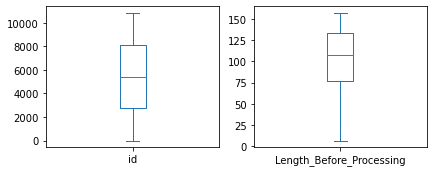

In [43]:
# drawing a box plots for all columns

df_train.plot(kind='box', subplots=True, layout=(5,5), figsize=(18,15))
plt.show()

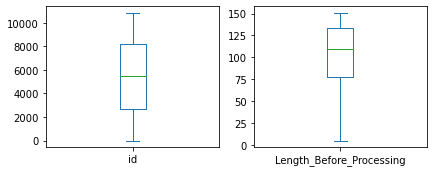

In [44]:
# drawing a box plots for all columns

df_test.plot(kind='box', subplots=True, layout=(5,5), figsize=(18,15))
plt.show()

#### No outliers are found

## Text Preproccessing

#### Preprocessing the Textual Data
- First we convert all the words in lowercase.
- Then we remove the punctutation,special characters,extra whitespaces and URLs using the regex expressions

#### Lower Case

In [45]:
df_train.tweet = df_train.tweet.str.lower()
df_test.tweet = df_test.tweet.str.lower()

df_train.tweet

0       our deeds are the reason of this #earthquake m...
1                  forest fire near la ronge sask. canada
2       all residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       just got sent this photo from ruby #alaska as ...
                              ...                        
7604    #worldnews fallen powerlines on g:link tram: u...
7605    on the flip side i'm at walmart and there is a...
7606    suicide bomber kills 15 in saudi security site...
7608    two giant cranes holding a bridge collapse int...
7612    the latest: more homes razed by northern calif...
Name: tweet, Length: 7503, dtype: object

#### Remove HTML
HyperText Markup Language, or HTML, is used to format the way that webpages flow. Many html entities snuck into the textual data. Additionally, text may contain html tags like "p", "h1", "a," or "div." These entities should be eliminated since they are just noise and, if left in place, will have a negative impact on the performance of the model.

In [46]:
def htmlRemoval(text):
    soup = BeautifulSoup(text)
    text = soup.get_text()
    return text

In [47]:
df_train["tweet"] = df_train["tweet"].apply(htmlRemoval)
df_test["tweet"] = df_test["tweet"].apply(htmlRemoval)
df_train.head()

,id,keyword,location,text,target,Length_Before_Processing,tweet
0,1,fire,"Chicago, IL",Our Deeds are the Reason of this #earthquake M...,Disaster Tweet,69,our deeds are the reason of this #earthquake m...
1,4,fire,"Washington, D.C.",Forest fire near La Ronge Sask. Canada,Disaster Tweet,38,forest fire near la ronge sask. canada
2,5,fire,New York,All residents asked to 'shelter in place' are ...,Disaster Tweet,133,all residents asked to 'shelter in place' are ...
3,6,fire,Los Angeles,"13,000 people receive #wildfires evacuation or...",Disaster Tweet,65,"13,000 people receive #wildfires evacuation or..."
4,7,fire,"Los Angeles, CA",Just got sent this photo from Ruby #Alaska as ...,Disaster Tweet,88,just got sent this photo from ruby #alaska as ...


#### Contractions Expansion
In informal speech, words are frequently condensed. Examples include can't: can not, they've: they have, or even more recent contractions like sux: sucks. These contractions are frequently regarded as stopwords and eliminated. The majority of these contractions are collected in the aptly titled python package contractions, which can be used to extend them as a preprocessing step.

In [48]:
df_train["tweet"] = df_train["tweet"].apply(contractions.fix)
df_test["tweet"] = df_test["tweet"].apply(contractions.fix)
df_train.head()

,id,keyword,location,text,target,Length_Before_Processing,tweet
0,1,fire,"Chicago, IL",Our Deeds are the Reason of this #earthquake M...,Disaster Tweet,69,our deeds are the reason of this #earthquake m...
1,4,fire,"Washington, D.C.",Forest fire near La Ronge Sask. Canada,Disaster Tweet,38,forest fire near la ronge sask. canada
2,5,fire,New York,All residents asked to 'shelter in place' are ...,Disaster Tweet,133,all residents asked to 'shelter in place' are ...
3,6,fire,Los Angeles,"13,000 people receive #wildfires evacuation or...",Disaster Tweet,65,"13,000 people receive #wildfires evacuation or..."
4,7,fire,"Los Angeles, CA",Just got sent this photo from Ruby #Alaska as ...,Disaster Tweet,88,just got sent this photo from ruby #alaska as ...


#### Remove Tweeter Mentions
There are @ mentions throughout the text. Typically, this may be seen on Twitter and in online forums. These mentions must be deleted before the punctuation, otherwise it will be difficult to locate them without the @ sign. They often consist of people's names and don't offer any further details that might be useful for the NLP assignment. 

In [49]:
def mentionsRemoval(text):
    pattern = re.compile(r"@\w+")
    text = re.sub(pattern, "", text)
    return text

In [50]:
df_train["tweet"] = df_train["tweet"].apply(mentionsRemoval)
df_test["tweet"] = df_test["tweet"].apply(mentionsRemoval)
df_train.head()

,id,keyword,location,text,target,Length_Before_Processing,tweet
0,1,fire,"Chicago, IL",Our Deeds are the Reason of this #earthquake M...,Disaster Tweet,69,our deeds are the reason of this #earthquake m...
1,4,fire,"Washington, D.C.",Forest fire near La Ronge Sask. Canada,Disaster Tweet,38,forest fire near la ronge sask. canada
2,5,fire,New York,All residents asked to 'shelter in place' are ...,Disaster Tweet,133,all residents asked to 'shelter in place' are ...
3,6,fire,Los Angeles,"13,000 people receive #wildfires evacuation or...",Disaster Tweet,65,"13,000 people receive #wildfires evacuation or..."
4,7,fire,"Los Angeles, CA",Just got sent this photo from Ruby #Alaska as ...,Disaster Tweet,88,just got sent this photo from ruby #alaska as ...


#### Remove URLs
The term URL, which stands for Uniform Resource Locator, is used to find resources on the internet. In the NLP task, they typically don't offer any more information, but they are challenging to manage otherwise. Therefore, they must be eliminated. To maintain the information about the presence of URLs in the text, all URLs can be fully erased or can be substituted with a common word like "website" or "url."

In [51]:
def urlRemoval(text):
    pattern = re.compile(r'https?://(www\.)?(\w+)(\.\w+)(/\w*)?')
    text = re.sub(pattern, "", text)
    return text

In [52]:
df_train["tweet"] = df_train["tweet"].apply(urlRemoval)
df_test["tweet"] = df_test["tweet"].apply(urlRemoval)
df_train.head()

,id,keyword,location,text,target,Length_Before_Processing,tweet
0,1,fire,"Chicago, IL",Our Deeds are the Reason of this #earthquake M...,Disaster Tweet,69,our deeds are the reason of this #earthquake m...
1,4,fire,"Washington, D.C.",Forest fire near La Ronge Sask. Canada,Disaster Tweet,38,forest fire near la ronge sask. canada
2,5,fire,New York,All residents asked to 'shelter in place' are ...,Disaster Tweet,133,all residents asked to 'shelter in place' are ...
3,6,fire,Los Angeles,"13,000 people receive #wildfires evacuation or...",Disaster Tweet,65,"13,000 people receive #wildfires evacuation or..."
4,7,fire,"Los Angeles, CA",Just got sent this photo from Ruby #Alaska as ...,Disaster Tweet,88,just got sent this photo from ruby #alaska as ...


#### Remove Email IDs
Same as urls, Email IDs appear everywhere and they don't provide any additional information (unless you expressly extract the emails from the text for a particular reason). Like in the previous example, email id can be deleted or changed to a common term like "email".

In [53]:
def emailRemoval(text):
    pattern = re.compile(r"[\w\.-]+@[\w\.-]+\.\w+")
    text = re.sub(pattern, "", text)
    return text

In [54]:
df_train["tweet"] = df_train["tweet"].apply(emailRemoval)
df_test["tweet"] = df_test["tweet"].apply(emailRemoval)
df_train.head()

,id,keyword,location,text,target,Length_Before_Processing,tweet
0,1,fire,"Chicago, IL",Our Deeds are the Reason of this #earthquake M...,Disaster Tweet,69,our deeds are the reason of this #earthquake m...
1,4,fire,"Washington, D.C.",Forest fire near La Ronge Sask. Canada,Disaster Tweet,38,forest fire near la ronge sask. canada
2,5,fire,New York,All residents asked to 'shelter in place' are ...,Disaster Tweet,133,all residents asked to 'shelter in place' are ...
3,6,fire,Los Angeles,"13,000 people receive #wildfires evacuation or...",Disaster Tweet,65,"13,000 people receive #wildfires evacuation or..."
4,7,fire,"Los Angeles, CA",Just got sent this photo from Ruby #Alaska as ...,Disaster Tweet,88,just got sent this photo from ruby #alaska as ...


#### Handling Diacritics
Diacritics marks (accents) are primarily used in proper names or terms that have been "borrowed" from another language, such as résumé and tête-à-tête. However, they are also often used in other European languages, such as Spanish, French, etc. Before eliminating unicode characters and handling punctuations, we must deal with these accented characters; else, they will be deleted. This might not be useful in the task of classifying tweets from the recent disaster because text data is too noisy and contains a lot of unicode characters that can be translated to ASCII characters to produce nonsense data.

In [55]:
def diacriticsHandler(text):
    text = unidecode(text)
    return text

In [56]:
df_train["tweet"] = df_train["tweet"].apply(diacriticsHandler)
df_test["tweet"] = df_test["tweet"].apply(diacriticsHandler)
df_train.head()

,id,keyword,location,text,target,Length_Before_Processing,tweet
0,1,fire,"Chicago, IL",Our Deeds are the Reason of this #earthquake M...,Disaster Tweet,69,our deeds are the reason of this #earthquake m...
1,4,fire,"Washington, D.C.",Forest fire near La Ronge Sask. Canada,Disaster Tweet,38,forest fire near la ronge sask. canada
2,5,fire,New York,All residents asked to 'shelter in place' are ...,Disaster Tweet,133,all residents asked to 'shelter in place' are ...
3,6,fire,Los Angeles,"13,000 people receive #wildfires evacuation or...",Disaster Tweet,65,"13,000 people receive #wildfires evacuation or..."
4,7,fire,"Los Angeles, CA",Just got sent this photo from Ruby #Alaska as ...,Disaster Tweet,88,just got sent this photo from ruby #alaska as ...


#### Handle Punctuations
Full stops are used to end sentences, among other punctuational devices, to define the text's structure. They are applicable to sentence tokenization. Punctuation, however, may not be necessary in some NLP tasks because it does not add any pertinent information.

In [57]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
def punctuationsRemoval(text):
    text = re.sub('[%s]' % re.escape(string.punctuation), " ",text)
    return text

In [59]:
df_train["tweet"] = df_train["tweet"].apply(punctuationsRemoval)
df_test["tweet"] = df_test["tweet"].apply(punctuationsRemoval)
df_train.head()

,id,keyword,location,text,target,Length_Before_Processing,tweet
0,1,fire,"Chicago, IL",Our Deeds are the Reason of this #earthquake M...,Disaster Tweet,69,our deeds are the reason of this earthquake m...
1,4,fire,"Washington, D.C.",Forest fire near La Ronge Sask. Canada,Disaster Tweet,38,forest fire near la ronge sask canada
2,5,fire,New York,All residents asked to 'shelter in place' are ...,Disaster Tweet,133,all residents asked to shelter in place are ...
3,6,fire,Los Angeles,"13,000 people receive #wildfires evacuation or...",Disaster Tweet,65,13 000 people receive wildfires evacuation or...
4,7,fire,"Los Angeles, CA",Just got sent this photo from Ruby #Alaska as ...,Disaster Tweet,88,just got sent this photo from ruby alaska as ...


#### Handling Digits or Words Containing Digits
In many circumstances, this might not be suitable such as flight codes ,In this situation, including this number in the text can be helpful for categorising the disaster tweets.

In [60]:
def digitsRemoval(text):
    pattern = re.compile("\w*\d+\w*")
    text = re.sub(pattern, "",text)
    return text

In [61]:
df_train["tweet"] = df_train["tweet"].apply(digitsRemoval)
df_test["tweet"] = df_test["tweet"].apply(digitsRemoval)
df_train.head()

,id,keyword,location,text,target,Length_Before_Processing,tweet
0,1,fire,"Chicago, IL",Our Deeds are the Reason of this #earthquake M...,Disaster Tweet,69,our deeds are the reason of this earthquake m...
1,4,fire,"Washington, D.C.",Forest fire near La Ronge Sask. Canada,Disaster Tweet,38,forest fire near la ronge sask canada
2,5,fire,New York,All residents asked to 'shelter in place' are ...,Disaster Tweet,133,all residents asked to shelter in place are ...
3,6,fire,Los Angeles,"13,000 people receive #wildfires evacuation or...",Disaster Tweet,65,people receive wildfires evacuation orders ...
4,7,fire,"Los Angeles, CA",Just got sent this photo from Ruby #Alaska as ...,Disaster Tweet,88,just got sent this photo from ruby alaska as ...


#### Handle Currency 
($22.434) or percentages (65\%). Such occurances can be replaced with words like "money amount" and "percentage".

In [62]:
def moneyAndPercentageHandler(text):
    text = re.sub(r"(₹|\$|£|€|¥)\s?\d+(\.\d+)?", "money amount",text)
    text = re.sub(r"\d+(\.\d+)?\s?%", "percentage",text)
    return text

In [63]:
df_train["tweet"] = df_train["tweet"].apply(moneyAndPercentageHandler)
df_test["tweet"] = df_test["tweet"].apply(moneyAndPercentageHandler)
df_train.head()

,id,keyword,location,text,target,Length_Before_Processing,tweet
0,1,fire,"Chicago, IL",Our Deeds are the Reason of this #earthquake M...,Disaster Tweet,69,our deeds are the reason of this earthquake m...
1,4,fire,"Washington, D.C.",Forest fire near La Ronge Sask. Canada,Disaster Tweet,38,forest fire near la ronge sask canada
2,5,fire,New York,All residents asked to 'shelter in place' are ...,Disaster Tweet,133,all residents asked to shelter in place are ...
3,6,fire,Los Angeles,"13,000 people receive #wildfires evacuation or...",Disaster Tweet,65,people receive wildfires evacuation orders ...
4,7,fire,"Los Angeles, CA",Just got sent this photo from Ruby #Alaska as ...,Disaster Tweet,88,just got sent this photo from ruby alaska as ...


#### Handling Abbreviations

There are numerous acronyms and abbreviations used in the text. These acronyms need to be enlarged earlier in the preprocessing process because they might contain important information for the classification task that is lost or altered during other preprocessing processes.

In [64]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    'hwy': 'highway',
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rip": "rest in peace",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    'w/e': 'whatever',
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [65]:
# Change an abbreviation to its true word
def fixAbbrev(text):
    return ' '.join([abbreviations[word.lower()] if (word.lower() in abbreviations.keys()) else word for word in text.split()])


In [66]:
df_train["tweet"] = df_train["tweet"].apply(fixAbbrev)
df_test["tweet"] = df_test["tweet"].apply(fixAbbrev)

#### Filtering Words that represent emotions

There are many characters that represent emotions of happiness and sadness that tell us what the user feel in the tweet so it will help us classifiy the tweet correctly. We need to handle most of these emotions in the dataset such as the heart <3 which represent love in text.

In [67]:
# Remove text in brackets
def removeBrackets(text):
    return re.sub(r'\[.*?\]', '', text)  

# Filter out words with too few characters (2 by default)
def filterWords(text):
    return ' '.join([word for word in text.split() if len(word) > 2])

# Replace <3 with LOVE
def transcriptionLove(text):
    love = re.compile(r'<3')
    return love.sub(r'love', text)

# Replace :D with very happy
def transcriptionVeryHappy(text):
    veryhappy = re.compile(r':D')
    return veryhappy.sub(r'very happy', text)

# Replace XD with funny
def transcriptionFunny(text):
    funny = re.compile(r'XD')
    return funny.sub(r'funny', text)

df_train["tweet"] = df_train["tweet"].apply(removeBrackets)
df_train["tweet"] = df_train["tweet"].apply(filterWords)
df_train["tweet"] = df_train["tweet"].apply(transcriptionLove)
df_train["tweet"] = df_train["tweet"].apply(transcriptionVeryHappy)
df_train["tweet"] = df_train["tweet"].apply(transcriptionFunny)

df_test["tweet"] = df_test["tweet"].apply(removeBrackets)
df_test["tweet"] = df_test["tweet"].apply(filterWords)
df_test["tweet"] = df_test["tweet"].apply(transcriptionLove)
df_test["tweet"] = df_test["tweet"].apply(transcriptionVeryHappy)
df_test["tweet"] = df_test["tweet"].apply(transcriptionFunny)

#### Replacing Logical Operators that we may find in text

Logical Operators such as < and & must be handled and be replaced before removing special characters as it may give us useful information about the tweet.

In [68]:
def replaceSymbols(text):
     # Replace symbols
    text = text.replace(r'&amp;?', r'and')
    text = text.replace(r'&lt;', r'lower than')
    text = text.replace(r'&gt;', r'greater than')
    text = text.replace('&amp;', " and ")
    return text

In [69]:
df_train["tweet"] = df_train["tweet"].apply(replaceSymbols)
df_test["tweet"] = df_test["tweet"].apply(replaceSymbols)

#### Removing Proper Nouns

A proper noun is a noun that serves as the name for a specific place, person, or thing. It doesn't give anything to useful for the machine learning models, So We need to remove them from the tweets column.

In this code, we first download the necessary NLTK data and load the DataFrame containing the tweet column. We then define a function called remove proper nouns that takes in a string of text, tokenizes it, and uses NLTK's POS tagger to tag each word in the text. We then remove any proper nouns (i.e., words tagged as 'NNP' or 'NNPS') from the text and join the remaining words back together.

Finally, we apply the remove proper nouns function to the tweet column in the DataFrame using the apply method, which applies the function to each row in the column.

Note that this approach may not be perfect and may remove some non-proper nouns that are misclassified by the POS tagger. However, it should work reasonably well for many cases.

In [70]:
# Download the necessary NLTK data
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

# Define a function to remove proper nouns
def removeProperNouns(text):
    tagged_text = nltk.pos_tag(nltk.word_tokenize(text))
    no_proper_nouns = [word for word, tag in tagged_text if tag != 'NNP' and tag != 'NNPS']
    return ' '.join(no_proper_nouns)

# Apply the function to the tweet column
df_train['tweet'] = df_train['tweet'].apply(removeProperNouns)
df_test['tweet'] = df_test['tweet'].apply(removeProperNouns)

In [71]:
pd.reset_option('max_colwidth', None)
df_train[['text','tweet']].head()

,text,tweet
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason this earthquake may a...
1,Forest fire near La Ronge Sask. Canada,forest fire near ronge sask canada
2,All residents asked to 'shelter in place' are ...,all residents asked shelter place are being no...
3,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation orders cal...
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska smok...


#### Handling Compound Words

Compound words occur when two or more words combine to form one individual word or a phrase that acts as one individual word. Common examples of compound words include ice cream, firefighter, and up-to-date. These words are difficult words to handle when applying models such as n-gram model to classifiy the tweet, We also need to handle such as these words in our data.

In this updated code, we use the dep_ attribute of the spaCy Token object to check if a token is part of a compound word. We filter out any tokens that have a dep_ value of 'compound', which indicates that they are part of a compound word.

We then filter out any non-compound words that are also on the list of known compound words, and join the remaining non-compound words back together into a string.

Finally, we apply the remove_compound_words function to the tweet column in the DataFrame using the apply method, which applies the function to each row in the column.

In [72]:
# Load the small English language model in spaCy
nlp = spacy.load('en_core_web_sm')

# Define a list of known compound words to remove
compound_words = ['ice cream', 'new york', 'high school']

# Define a function to remove compound words
def removeCompoundWords(text):
    doc = nlp(text)
    no_compounds = [token.text for token in doc if token.dep_ != 'compound']
    filtered = [word for word in no_compounds if word not in compound_words]
    return ' '.join(filtered)

# Apply the function to the tweet column
df_train['tweet'] = df_train['tweet'].apply(removeCompoundWords)
df_test['tweet'] = df_test['tweet'].apply(removeCompoundWords)

In [73]:
pd.reset_option('max_colwidth', None)
df_train[['text','tweet']].head(20)

,text,tweet
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason this earthquake may a...
1,Forest fire near La Ronge Sask. Canada,fire near canada
2,All residents asked to 'shelter in place' are ...,all residents asked place are being notified o...
3,"13,000 people receive #wildfires evacuation or...",people receive orders california
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from smoke from pours...
5,#RockyFire Update => California Hwy. 20 closed...,highway closed both directions due cafire wild...
6,#flood #disaster Heavy rain causes flash flood...,disaster heavy rain causes areas
7,I'm on top of the hill and I can see a fire in...,top the hill and can see fire the woods
8,There's an emergency evacuation happening now ...,there evacuation happening now the building ac...
9,I'm afraid that the tornado is coming to our a...,afraid that the tornado coming our area


#### Handling Idioms and Figurative Language

Idioms are a group of words established by usage as having a meaning not deducible from those of the individual words.
Figurative language is phrasing that goes beyond the literal meaning of words to get a message or point across.
for intsance a piece of cake doesn't mean it's true meaning but it means this something the user refer to is easy to make.

They may be in tweets column and prevent our model from classifying the tweets correctly so we need to handle them in the dataset

In this code, we first load the DataFrame containing the text column.

Next, we initialize the VADER sentiment analysis model using the SentimentIntensityAnalyzer class from NLTK's nltk.sentiment.vader module. This model can be used to calculate a sentiment score for each piece of text.

We then define a function called remove figurative language that takes in a string of text, calculates the sentiment score using the VADER model, and then returns an empty string if the sentiment score is above a certain threshold (in this case, 0.5), indicating that the text is likely to contain figurative language. If the sentiment score is below the threshold, we return the original text.

Finally, we apply the remove figurative language function to the tweet column in the DataFrame using the apply method, which applies the function to each row in the column.

This approach is not perfect and may remove some non-figurative language text that has a high sentiment score. However, it can be a useful starting point for identifying and removing text that is likely to contain idioms or figurative language.

In [74]:
#nltk.download('vader_lexicon')

# Initialize the VADER sentiment analysis model
sia = SentimentIntensityAnalyzer()
# Define a function to remove text with high sentiment scores
def removeFigurativeLanguage(text):
    sentiment = sia.polarity_scores(text)
    # values range from -1 to 1 
    if sentiment['compound'] > 0.5:
        return ''
    else:
        return text

# Apply the function to the tweet column
df_train['tweet'] = df_train['tweet'].apply(removeFigurativeLanguage)
df_test['tweet'] = df_test['tweet'].apply(removeFigurativeLanguage)

#### Spell Checking - takes a lot of time over an hour :)

Spelling correction can assist decrease word variants and prevent information from being misrepresented. It can be useful in the NLP task of tweet classification in the example under consideration because tweets are particularly susceptible to typos, whether accidental or intentional. There are a few possibilities, including TextBlob's spell checker can help us correct the text so we can use in classification.

In [75]:
spell = SpellChecker()
def correctSpellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    print(misspelled_words)
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
text = "corect me plese"
correctSpellings(text)

{'corect'}


'correct me plese'

In [76]:
# Apply the function to the tweet column
# df_train['tweet'] = df_train['tweet'].apply(correctSpellings)
# df_test['tweet'] = df_test['tweet'].apply(correctSpellings)

In [77]:
# fixing words with repeated character that repeated more than two times such as goaaaal
def spellChecker(text):
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
    return text

In [78]:
df_train['tweet'] = df_train['tweet'].apply(lambda x: spellChecker(x))
df_test['tweet'] = df_test['tweet'].apply(lambda x: spellChecker(x))

In [79]:
#df_train['tweet'].apply(lambda x: str(TextBlob(x).correct()))
#df_test['tweet'].apply(lambda x: str(TextBlob(x).correct()))

#### Handling Emojis
Emojis are typically deleted, but when they are used in tweets about disasters, they may contain sensitive information and must be handled carefully.

In [80]:
def removeEmoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [81]:
df_train['tweet'] = df_train['tweet'].apply(lambda x: removeEmoji(x))
df_test['tweet'] = df_test['tweet'].apply(lambda x: removeEmoji(x))
df_train.head(10)

,id,keyword,location,text,target,Length_Before_Processing,tweet
0,1,fire,"Chicago, IL",Our Deeds are the Reason of this #earthquake M...,Disaster Tweet,69,our deeds are the reason this earthquake may a...
1,4,fire,"Washington, D.C.",Forest fire near La Ronge Sask. Canada,Disaster Tweet,38,fire near canada
2,5,fire,New York,All residents asked to 'shelter in place' are ...,Disaster Tweet,133,all residents asked place are being notified o...
3,6,fire,Los Angeles,"13,000 people receive #wildfires evacuation or...",Disaster Tweet,65,people receive orders california
4,7,fire,"Los Angeles, CA",Just got sent this photo from Ruby #Alaska as ...,Disaster Tweet,88,just got sent this photo from smoke from pours...
5,8,fire,Los Angeles,#RockyFire Update => California Hwy. 20 closed...,Disaster Tweet,110,highway closed both directions due cafire wild...
6,10,fire,London,#flood #disaster Heavy rain causes flash flood...,Disaster Tweet,95,disaster heavy rain causes areas
7,13,fire,Florida,I'm on top of the hill and I can see a fire in...,Disaster Tweet,59,top the hill and can see fire the woods
8,14,fire,Nigeria,There's an emergency evacuation happening now ...,Disaster Tweet,79,there evacuation happening now the building ac...
9,15,fire,"Chicago, IL",I'm afraid that the tornado is coming to our a...,Disaster Tweet,52,afraid that the tornado coming our area


#### Remove Unicode Charachers
The Unicode Standard, also known as Unicode, is a set of information technology guidelines for the uniform encoding, processing, and representation of text in the majority of the world's writing systems. The Unicode Consortium maintains the standard, which includes symbols, emojis and formatting codes, and characters encompassing modern and historic scripts.

The ASCII character set, in contrast, includes just 128 characters, including numbers, upper- and lower-case English letters, a few punctuation marks, and control characters. Many times, we must represent text solely using alphanumeric characters, omitting the other Unicode characters in the process. (This may not be true while working with languages other than English)

In [82]:
def unicodeCharactersRemoval(text):
    text = text.encode("ascii", "ignore").decode()
    return text

In [83]:
df_train["tweet"] = df_train["tweet"].apply(unicodeCharactersRemoval)
df_test["tweet"] = df_test["tweet"].apply(unicodeCharactersRemoval)
df_train.head()

,id,keyword,location,text,target,Length_Before_Processing,tweet
0,1,fire,"Chicago, IL",Our Deeds are the Reason of this #earthquake M...,Disaster Tweet,69,our deeds are the reason this earthquake may a...
1,4,fire,"Washington, D.C.",Forest fire near La Ronge Sask. Canada,Disaster Tweet,38,fire near canada
2,5,fire,New York,All residents asked to 'shelter in place' are ...,Disaster Tweet,133,all residents asked place are being notified o...
3,6,fire,Los Angeles,"13,000 people receive #wildfires evacuation or...",Disaster Tweet,65,people receive orders california
4,7,fire,"Los Angeles, CA",Just got sent this photo from Ruby #Alaska as ...,Disaster Tweet,88,just got sent this photo from smoke from pours...


#### Remove Stopwords
One of the basic preprocessing steps in many NLP jobs is stopword removal. Stopwords are words like "a, and, the, is, can" that are eliminated from the text to leave just terms with lots of information.

In [84]:
stopWords = set(stopwords.words('english'))
print(stopWords)

{'a', 'during', 'how', 'up', 'below', 'd', "aren't", 'other', 'but', 'we', 'same', 'ourselves', 'themselves', 'its', 'again', 'my', 'itself', 'why', 'are', "haven't", "you're", 'your', "weren't", 'and', 'into', 'own', 'it', 'she', 'or', 'mightn', 'against', 'no', 'through', "wouldn't", 'than', 'here', 'was', 'such', "it's", "hadn't", 'of', 'so', 'won', 'that', 'couldn', 'these', "you'll", 'himself', 'further', 'when', 'very', 'whom', 'm', 'is', 'ain', 'have', 'now', 'all', 'hers', 'once', 'yourself', 'should', "mustn't", "won't", 'to', "isn't", 'between', 'until', 'off', 'her', 'theirs', 'had', 'any', 'being', 'he', "should've", 'then', "you've", "doesn't", 'above', 'aren', "that'll", 'haven', "couldn't", 're', 'ma', 'll', 'been', 'do', 'not', 'if', 'what', 'i', 'did', 'the', 'wasn', "needn't", "shouldn't", "she's", 'which', 'while', 'who', 'doing', 'more', 'from', 'mustn', 'myself', 'about', 'them', 'you', 'his', 'for', 'yourselves', 'wouldn', "shan't", 'under', "you'd", 'with', 'down

In [85]:
def stopwordsRemoval(text):
    return " ".join([word for word in str(text).split() if word not in stopWords])

In [86]:
df_train["tweet"] = df_train["tweet"].apply(stopwordsRemoval)
df_test["tweet"] = df_test["tweet"].apply(stopwordsRemoval)
df_train.head()

,id,keyword,location,text,target,Length_Before_Processing,tweet
0,1,fire,"Chicago, IL",Our Deeds are the Reason of this #earthquake M...,Disaster Tweet,69,deeds reason earthquake may allah forgive
1,4,fire,"Washington, D.C.",Forest fire near La Ronge Sask. Canada,Disaster Tweet,38,fire near canada
2,5,fire,New York,All residents asked to 'shelter in place' are ...,Disaster Tweet,133,residents asked place notified officers orders...
3,6,fire,Los Angeles,"13,000 people receive #wildfires evacuation or...",Disaster Tweet,65,people receive orders california
4,7,fire,"Los Angeles, CA",Just got sent this photo from Ruby #Alaska as ...,Disaster Tweet,88,got sent photo smoke pours school


#### Removing Extra Spaces
During preprocessing procedures, Extra spaces need to be deleted are added to the text at the beginning, end, or in between words.

In [87]:
def extraSpaceRemoval(text): 
    text = re.sub(' +', ' ', text).strip()
    return text 

In [88]:
df_train["tweet"] = df_train["tweet"].apply(extraSpaceRemoval)
df_test["tweet"] = df_test["tweet"].apply(extraSpaceRemoval)
df_train.head()

,id,keyword,location,text,target,Length_Before_Processing,tweet
0,1,fire,"Chicago, IL",Our Deeds are the Reason of this #earthquake M...,Disaster Tweet,69,deeds reason earthquake may allah forgive
1,4,fire,"Washington, D.C.",Forest fire near La Ronge Sask. Canada,Disaster Tweet,38,fire near canada
2,5,fire,New York,All residents asked to 'shelter in place' are ...,Disaster Tweet,133,residents asked place notified officers orders...
3,6,fire,Los Angeles,"13,000 people receive #wildfires evacuation or...",Disaster Tweet,65,people receive orders california
4,7,fire,"Los Angeles, CA",Just got sent this photo from Ruby #Alaska as ...,Disaster Tweet,88,got sent photo smoke pours school


#### Stemming or Lemmatization
Lemmatization makes use of the word's context, whereas stemming makes use of the word's stem. However, stemming results in spelling and meaning errors. Based on the context, lemmatization generates words that have meaning. As a result, I often favour lemmatization over stemming.

In [89]:
lemmatizer = WordNetLemmatizer()
def textLemmatizer(text):
    words = [lemmatizer.lemmatize(word) for word in text.split()]
    text = ' '.join(words)
    return text

In [90]:
df_train["tweet"] = df_train["tweet"].apply(textLemmatizer)
df_test["tweet"] = df_test["tweet"].apply(textLemmatizer)
df_train.head()

,id,keyword,location,text,target,Length_Before_Processing,tweet
0,1,fire,"Chicago, IL",Our Deeds are the Reason of this #earthquake M...,Disaster Tweet,69,deed reason earthquake may allah forgive
1,4,fire,"Washington, D.C.",Forest fire near La Ronge Sask. Canada,Disaster Tweet,38,fire near canada
2,5,fire,New York,All residents asked to 'shelter in place' are ...,Disaster Tweet,133,resident asked place notified officer order ex...
3,6,fire,Los Angeles,"13,000 people receive #wildfires evacuation or...",Disaster Tweet,65,people receive order california
4,7,fire,"Los Angeles, CA",Just got sent this photo from Ruby #Alaska as ...,Disaster Tweet,88,got sent photo smoke pours school


In [91]:
# creating new column for storing length of reviews 
df_train['Length_After_Processing'] = df_train['tweet'].apply(len)
df_test['Length_After_Processing'] = df_test['tweet'].apply(len)

df_train.head()

,id,keyword,location,text,target,Length_Before_Processing,tweet,Length_After_Processing
0,1,fire,"Chicago, IL",Our Deeds are the Reason of this #earthquake M...,Disaster Tweet,69,deed reason earthquake may allah forgive,40
1,4,fire,"Washington, D.C.",Forest fire near La Ronge Sask. Canada,Disaster Tweet,38,fire near canada,16
2,5,fire,New York,All residents asked to 'shelter in place' are ...,Disaster Tweet,133,resident asked place notified officer order ex...,52
3,6,fire,Los Angeles,"13,000 people receive #wildfires evacuation or...",Disaster Tweet,65,people receive order california,31
4,7,fire,"Los Angeles, CA",Just got sent this photo from Ruby #Alaska as ...,Disaster Tweet,88,got sent photo smoke pours school,33


array([<AxesSubplot:title={'center':'Disaster Tweet'}>,
       <AxesSubplot:title={'center':'Normal Tweet'}>], dtype=object)

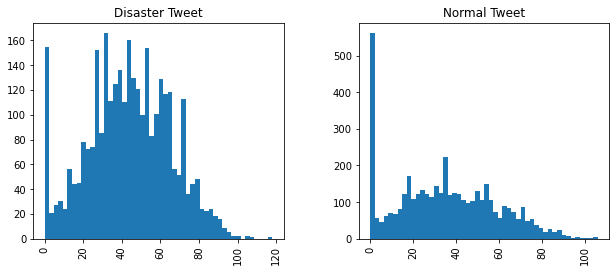

In [92]:
df_train.hist(column='Length_After_Processing', by='target', bins=50,figsize=(10,4))

### Encoding

In [93]:
#Check types for all the columns using dtypes
print("Train Data:\n")
print(df_train.dtypes)
print("\nTest Data:\n")
print(df_test.dtypes)

Train Data:

id                           int64
keyword                     object
location                    object
text                        object
target                      object
Length_Before_Processing     int64
tweet                       object
Length_After_Processing      int64
dtype: object

Test Data:

id                           int64
keyword                     object
location                    object
text                        object
Length_Before_Processing     int64
tweet                       object
Length_After_Processing      int64
dtype: object


In [94]:
df_train.head()

,id,keyword,location,text,target,Length_Before_Processing,tweet,Length_After_Processing
0,1,fire,"Chicago, IL",Our Deeds are the Reason of this #earthquake M...,Disaster Tweet,69,deed reason earthquake may allah forgive,40
1,4,fire,"Washington, D.C.",Forest fire near La Ronge Sask. Canada,Disaster Tweet,38,fire near canada,16
2,5,fire,New York,All residents asked to 'shelter in place' are ...,Disaster Tweet,133,resident asked place notified officer order ex...,52
3,6,fire,Los Angeles,"13,000 people receive #wildfires evacuation or...",Disaster Tweet,65,people receive order california,31
4,7,fire,"Los Angeles, CA",Just got sent this photo from Ruby #Alaska as ...,Disaster Tweet,88,got sent photo smoke pours school,33


In [95]:
# transforming the datatype

df_train.tweet = df_train.tweet.astype("string")
df_train.text = df_train.text.astype("string")
df_train.keyword = df_train.keyword.astype("string")
df_train.location = df_train.location.astype("string")

df_test.tweet = df_test.tweet.astype("string")
df_test.text = df_test.text.astype("string")
df_test.keyword = df_test.keyword.astype("string")
df_test.location = df_test.location.astype("string")


df_train.target = df_train.target.apply(lambda x: 1 if x == "Disaster Tweet" else 0)

In [96]:
df_train.head()

,id,keyword,location,text,target,Length_Before_Processing,tweet,Length_After_Processing
0,1,fire,"Chicago, IL",Our Deeds are the Reason of this #earthquake M...,1,69,deed reason earthquake may allah forgive,40
1,4,fire,"Washington, D.C.",Forest fire near La Ronge Sask. Canada,1,38,fire near canada,16
2,5,fire,New York,All residents asked to 'shelter in place' are ...,1,133,resident asked place notified officer order ex...,52
3,6,fire,Los Angeles,"13,000 people receive #wildfires evacuation or...",1,65,people receive order california,31
4,7,fire,"Los Angeles, CA",Just got sent this photo from Ruby #Alaska as ...,1,88,got sent photo smoke pours school,33


In [97]:
#Check types for all the columns using dtypes
print("Train Data:\n")
print(df_train.dtypes)
print("\nTest Data:\n")
print(df_test.dtypes)

Train Data:

id                           int64
keyword                     string
location                    string
text                        string
target                       int64
Length_Before_Processing     int64
tweet                       string
Length_After_Processing      int64
dtype: object

Test Data:

id                           int64
keyword                     string
location                    string
text                        string
Length_Before_Processing     int64
tweet                       string
Length_After_Processing      int64
dtype: object


### Feature Extraction & Modelling

feature extraction is the process of converting text into numerical features that machine learning algorithms can understand. Bag of words, binary encoding, and TF-IDF are three popular feature extraction techniques used in NLP.

In [98]:
# giving labels to our values
labels = {
    0: "Normal Tweet",
    1: "Disaster Tweet",
}

In [99]:
# Results summarizer function (scores, confusion matrix) for classification results
def resultsSummarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='binary')
    rec = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    
    
    plt.figure(figsize=(7, 7))
    
    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=labels.values(),
                yticklabels=labels.values()
               ) 
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Tweet')
    plt.ylabel('Actual Tweet')
    plt.show()
    
    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

#### Bag of Words (BoW) Feature Extraction:

Bag of words is a simple technique where the frequency of each word in the text is counted and used as a feature. The resulting vector is a representation of the count of words in the text, and the order of words is ignored. Bag of words works well when the focus is on the presence or absence of certain words in the text and not on the order of words in the text.

#### Applying Logistic Regression model with Bag of Words (BoW) Feature Extraction

#### Train Test Split

In [100]:
# Define the feature vector and the target variable
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

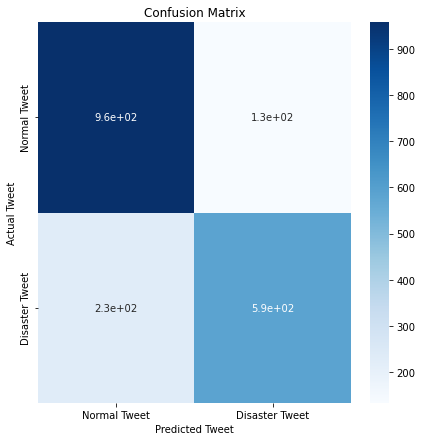

Accuracy Score: 81.0924%
Precision Score: 81.5021%
Recall Score: 72.0787%
F_1 Score: 76.5013%


In [101]:
# Train the logistic regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict the test set
y_pred_lr = lr.predict(X_test)

# Evaluate the model on the testing set
resultsSummarizer(y_test, y_pred_lr)

#### Applying Random Forest Classifier model with Bag of Words (BoW) Feature Extraction

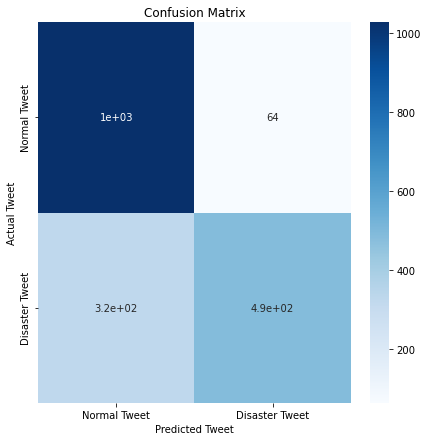

Accuracy Score: 79.5693%
Precision Score: 88.4058%
Recall Score: 60.0246%
F_1 Score: 71.5018%


In [102]:
# Train the model
rfst = RandomForestClassifier(n_estimators=100, random_state=42)
rfst.fit(X_train, y_train)

# Predict on the testing set and calculate accuracy
y_pred_rfst = rfst.predict(X_test)
# Evaluate the model on the testing set
resultsSummarizer(y_test, y_pred_rfst)

#### TF-IDF Feature Extraction:

TF-IDF stands for term frequency-inverse document frequency. It takes into account the frequency of a word in the text and the frequency of the word in the entire corpus. The idea behind TF-IDF is that a word that appears frequently in a text but not frequently in the corpus is more important than a word that appears frequently in both. The resulting vector represents the importance of each word in the text. TF-IDF is a popular technique in NLP, and it works well when the focus is on the relevance of each word in the text.

#### Applying Term Frequency-Inverse Document Frequency (TF-IDF) Feature Extraction & Modelling with Logistic Regression

#### Preparing and Spliting the data with 75% for  train and 25% for test

In [103]:
# Prepare the data
X = df_train['tweet']
y = df_train['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [104]:
# Apply TF-IDF feature extraction
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [105]:
# Print the shape of the feature matrices
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (5627,)
Testing set shape: (1876,)


In [106]:
# Train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)

# Evaluate the model on the testing set
score = logreg.score(X_test_tfidf, y_test)
print('Accuracy of Logistic Regression is::', score)

Accuracy of Logistic Regression is:: 0.7713219616204691


#### Binary Encoding  Feature Extraction:

Binary encoding is similar to the bag of words technique, but it only takes into account whether a word is present in the text or not, ignoring the frequency. This results in a binary feature vector where 1 indicates the presence of a word, and 0 indicates the absence of a word. Binary encoding works well when the frequency of words is not important, and the focus is only on the presence or absence of certain words in the text.

#### Applying Binary Encoding Feature Extraction & Modelling with Logistic Regression

In [107]:
# Prepare the data
X = df['text']
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Saving the model for later use in deployment

In [108]:
import pickle

vectorizer = CountVectorizer(binary=True)
X_train_bin = vectorizer.fit_transform(X_train)
X_test_bin = vectorizer.transform(X_test) 

pickle.dump(vectorizer, open("vecotrizer.pkl", 'wb'))

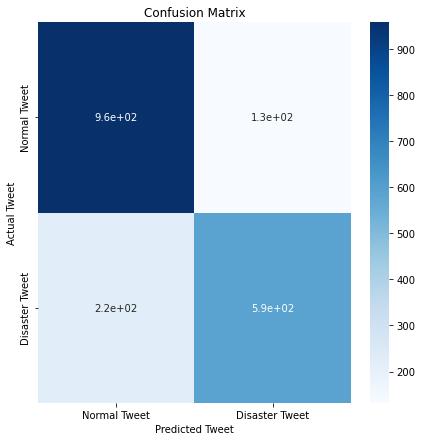

Accuracy Score: 81.3025%
Precision Score: 81.6921%
Recall Score: 72.4477%
F_1 Score: 76.7927%


In [109]:
# Apply binary encoding to the text data
vectorizer = CountVectorizer(binary=True)
X_train_bin = vectorizer.fit_transform(X_train)
X_test_bin = vectorizer.transform(X_test)

# Train a logistic regression model
LR = LogisticRegression()
LR.fit(X_train_bin, y_train)

# Evaluate the model
y_pred_LR = LR.predict(X_test_bin)
resultsSummarizer(y_test, y_pred_LR)
pickle.dump(LR, open("Predict_model.pkl", 'wb'))

In [110]:
data = pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred_LR})
data[:20]

,y_Test,y_pred
2644,1,0
2227,0,0
5448,1,1
132,0,0
6845,0,0
5559,0,0
1765,1,0
1817,1,0
6810,0,0
4398,1,1


#### N-Gram Feature Extraction:

N-Gram feature extraction is a technique where contiguous sequences of n words, also known as "n-grams", are extracted from a text document and used as features in a machine learning model.

For example, in a bigram feature extraction, contiguous sequences of 2 words are extracted from the text document. In trigram feature extraction, contiguous sequences of 3 words are extracted, and so on.

N-gram feature extraction is useful because it captures the contextual information of words in a document. It can help in identifying common phrases and idiomatic expressions, which are often informative in distinguishing between different classes of documents.

N-gram feature extraction can be combined with different weighting schemes such as term frequency–inverse document frequency (TF-IDF) to improve the performance of machine learning models on text classification tasks.

#### Applying Unigram and Bigram Feature Extraction & Modelling with Logistic Regression

##### N-Gram
In this step, we will vectorize the textual data using Term Frequency Inverse Document Frequency(TFIDF) as machine learning model only understand numeric data. Using TDIDF we will be building bi-grams vectorizer, In this case, we will be using ngram_range = (1,2) which means it will take both unigram and bi-grams as a feature from text.

In [111]:
# Create feature matrix and target vector using Unigram and bigram feature extraction
nvectorizer = CountVectorizer(ngram_range=(1,2), max_df=1.0, min_df=1, max_features=None)
X = nvectorizer.fit_transform(df["text"])
y = df["target"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

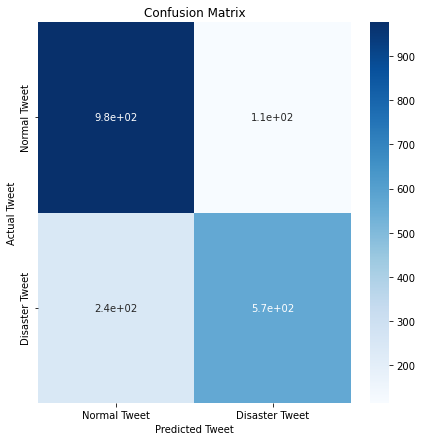

Accuracy Score: 81.1975%
Precision Score: 83.3089%
Recall Score: 69.9877%
F_1 Score: 76.0695%


In [112]:
# Train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the testing set and calculate accuracy
y_pred = model.predict(X_test)
# Evaluate the model on the testing set
resultsSummarizer(y_test, y_pred)

#### Preprocessing keyword column so we can use it in classifying the tweets. 

In [113]:
df_train = pd.read_csv("train.csv", sep=",", encoding="utf-8")
df_test = pd.read_csv("test.csv", sep=",", encoding="utf-8")

df_train.keyword = df_train.keyword.fillna("None")
df_test.keyword = df_test.keyword.fillna("None")

# lemmatizing words to make it less complicated .... we will get to it later after a few cells
lemmatizer = WordNetLemmatizer()

# making a list that contain all the keywords that help in classifying the disaster tweets
keywordList = []
for keyword in df_train.keyword:
    keyword = lemmatizer.lemmatize(keyword)
    if(keyword != "None" and keyword not in keywordList):
        keywordList.append(keyword)
        
print(keywordList)


for text in df_train.text:
    for word in text.split(" "): 
        if(word in keywordList):
            df_train.keyword = df_train.keyword.replace("None", word)
            
for text in df_test.text:
    for word in text.split(" "): 
        if(word in keywordList):
            df_test.keyword = df_test.keyword.replace("None", word)
            
print(df_train.keyword.isnull().sum())
print(df_test.keyword.isnull().sum())

df_train["keyword"] = df_train["keyword"].fillna("")

# making a new column for tweets + keywords so we will use it in ML Models
df_train["tweet"] = df_train["keyword"] + " " + df_train["text"]
df_test["tweet"] = df_test["keyword"] + " " + df_test["text"]

df_train.tweet.head()

['ablaze', 'accident', 'aftershock', 'airplane%20accident', 'ambulance', 'annihilated', 'annihilation', 'apocalypse', 'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked', 'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze', 'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood', 'bloody', 'blown%20up', 'body%20bag', 'body%20bagging', 'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse', 'buildings%20burning', 'buildings%20on%20fire', 'burned', 'burning', 'burning%20buildings', 'bush%20fires', 'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency', 'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided', 'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew', 'cyclone', 'damage', 'danger', 'dead', 'death', 'debris', 'deluge', 'deluged', 'demolish', 'demolished', 'demolition', 'derail', 'derailed', 'derailment', 'desolate', 'desolation', 'destroy', 'destroyed', 'destruction', 'detonate', 'detonation', 'devastated', 'devas

0    fire Our Deeds are the Reason of this #earthqu...
1          fire Forest fire near La Ronge Sask. Canada
2    fire All residents asked to 'shelter in place'...
3    fire 13,000 people receive #wildfires evacuati...
4    fire Just got sent this photo from Ruby #Alask...
Name: tweet, dtype: object

In [114]:
features = nvectorizer.fit_transform(df_train['tweet'])

In [115]:
df_train.head()

,id,keyword,location,text,target,tweet
0,1,fire,NaN,Our Deeds are the Reason of this #earthquake M...,1,fire Our Deeds are the Reason of this #earthqu...
1,4,fire,NaN,Forest fire near La Ronge Sask. Canada,1,fire Forest fire near La Ronge Sask. Canada
2,5,fire,NaN,All residents asked to 'shelter in place' are ...,1,fire All residents asked to 'shelter in place'...
3,6,fire,NaN,"13,000 people receive #wildfires evacuation or...",1,"fire 13,000 people receive #wildfires evacuati..."
4,7,fire,NaN,Just got sent this photo from Ruby #Alaska as ...,1,fire Just got sent this photo from Ruby #Alask...


In [116]:
df1 = pd.DataFrame(features.toarray(),columns=nvectorizer.vocabulary_.keys())
df1

,fire,our,deeds,are,the,reason,of,this,earthquake,may,...,news wall,co nf4iculoje,fire stormchase,stfmbbzfb5,fire two,co stfmbbzfb5,fire aria_ahrary,fire m1,ymy4rskq3d,co ymy4rskq3d
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Spliting The data

In [117]:
# Split data between predictors and output variable
x = features
y = df_train['target'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [118]:
print(x_train.shape)
print(x_test.shape)
print("---"*25)
print(y_train.shape)
print(y_test.shape)

(5709, 95892)
(1904, 95892)
---------------------------------------------------------------------------
(5709,)
(1904,)


### Scalling using Standard scaler

In [119]:
# Scale train/ test predictors based on training data
s_scaler = StandardScaler(with_mean= False).fit(x_train)
x_train_scaled = s_scaler.transform(x_train)
x_test_scaled = s_scaler.transform(x_test)

### Applying different Machine Learning models in the data.

### Logistic Regression

In [120]:
lr = LogisticRegression()

In [121]:
lr.fit(x_train , y_train)

LogisticRegression()

In [122]:
lr.score(x_train , y_train)

0.9954457873533018

In [123]:
lr.score(x_test , y_test)

0.8140756302521008

In [124]:
y_pred_lr = lr.predict(x_test)
data = pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred_lr})
data[:20]

,y_Test,y_pred
0,1,0
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,1,0
7,1,0
8,0,0
9,1,1


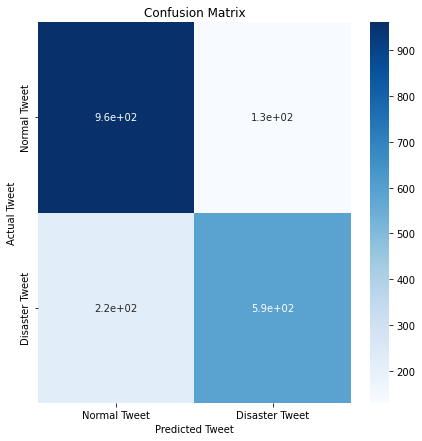

Accuracy Score: 81.4076%
Precision Score: 81.9193%
Recall Score: 72.4477%
F_1 Score: 76.8930%


In [125]:
resultsSummarizer(y_test, y_pred_lr)

### KNN

In [126]:
knn=KNeighborsClassifier(n_neighbors=7)

In [127]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [128]:
knn.score(x_train,y_train)

0.6887370818006656

In [129]:
knn.score(x_test,y_test)

0.664390756302521

In [130]:
y_pred=knn.predict(x_test)
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred})
data[:20]

,y_Test,y_pred
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0
5,0,0
6,1,0
7,1,0
8,0,0
9,1,0


In [131]:
y_pred_knn = knn.predict(x_test)

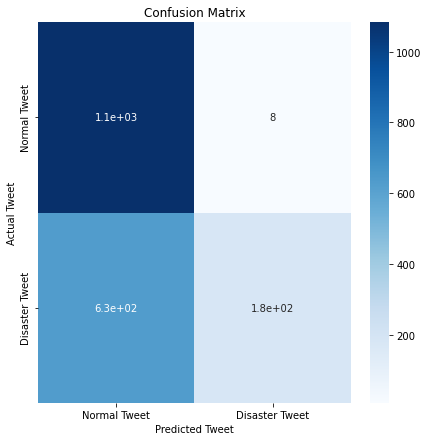

Accuracy Score: 66.4391%
Precision Score: 95.7895%
Recall Score: 22.3862%
F_1 Score: 36.2911%


In [132]:
resultsSummarizer(y_test, y_pred_knn)

### Decision Tree

In [133]:
dt=DecisionTreeClassifier(max_depth=23)

In [134]:
dt.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=23)

In [135]:
dt.score(x_train_scaled,y_train)

0.8069714485899457

In [136]:
dt.score(x_test_scaled,y_test)

0.7074579831932774

In [137]:
dt.fit(x_train, y_train)
y_pred_tree = dt.predict(x_test)

In [138]:
y_pred=dt.predict(x_test)
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred})
data[:20]

,y_Test,y_pred
0,1,0
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,1,0
7,1,0
8,0,0
9,1,0


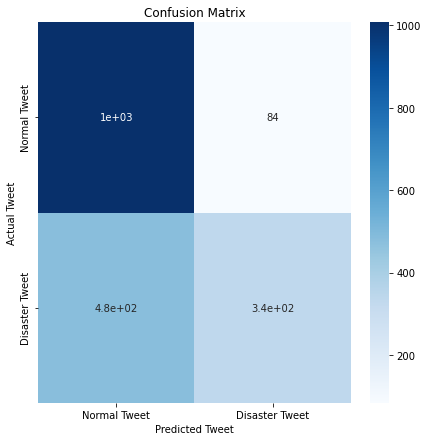

Accuracy Score: 70.5357%
Precision Score: 80.0000%
Recall Score: 41.3284%
F_1 Score: 54.5012%


In [139]:
resultsSummarizer(y_test, y_pred_tree)

### Random Forest Classifer

In [140]:
rfst = RandomForestClassifier(n_estimators=10,random_state=42)
rfst.fit(x_train, y_train)
y_pred_rfst = rfst.predict(x_test)

In [141]:
y_pred=rfst.predict(x_test)
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred})
data[:20]

,y_Test,y_pred
0,1,0
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,1,0
7,1,0
8,0,0
9,1,1


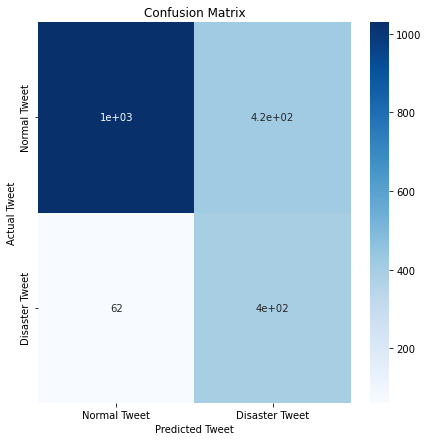

Accuracy Score: 74.8424%
Precision Score: 48.7085%
Recall Score: 86.4629%
F_1 Score: 62.3131%


In [142]:
resultsSummarizer(y_pred_rfst, y_test)

### Gaussian

In [143]:
MNB = MultinomialNB()
MNB.fit(x_train, y_train)
y_pred_MNB = MNB.predict(x_test)

In [144]:
y_pred=MNB.predict(x_test)
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred})
data[:20]

,y_Test,y_pred
0,1,0
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,1,0
7,1,0
8,0,0
9,1,1


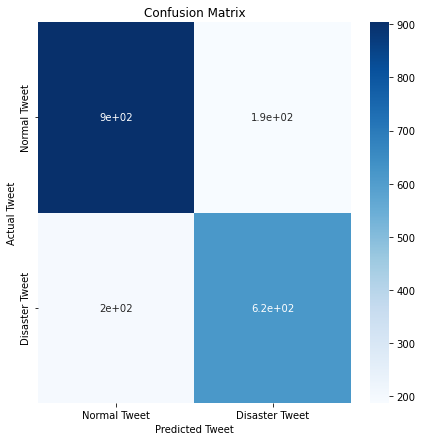

Accuracy Score: 79.8319%
Precision Score: 76.7123%
Recall Score: 75.7688%
F_1 Score: 76.2376%


In [145]:
resultsSummarizer(y_test, y_pred_MNB)

In [146]:
tweets_df = df_train.to_csv("distaster_tweets_cleaned.csv")

#### Making Two Functions for Visualization of data lost and the accuracy of our deep learning models we will create.

In [147]:
def plotAccuracy(modelHistory):
    # drawing a plot to see the accuracy of the data
    plt.figure(figsize=(12, 8))
    plt.plot(modelHistory.history["accuracy"], label="Training accuracy", marker="o", color="blue")
    plt.plot(modelHistory.history["val_accuracy"], label="Validation accuracy", marker="o", color="red")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy of Data")
    plt.title("Training VS Validation Accuracy", fontsize=18)
    plt.legend()
    plt.show()

def plotLoss(modelHistory):
    # drawing a plot to see loss data
    plt.figure(figsize=(12, 8))
    plt.plot(modelHistory.history["loss"], label="Training loss", marker="o", color="blue")
    plt.plot(modelHistory.history["val_loss"], label="Validation loss", marker="o", color="red")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss in Data")
    plt.title("Training VS Validation loss", fontsize=18)
    plt.legend()
    plt.show()

### Applying Deep Learning Models:

### First LSTM Model

In [148]:
# reading dataframe
# df_train = pd.read_csv("train.csv", sep=",", encoding="utf-8")
# Load and preprocess the data
texts = df_train.tweet.tolist()
labels = df_train.target.tolist()
# Preprocess the texts (e.g. remove stop words, stem/lemmatize, lowercase)

# Vectorize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=100)
y = np.array(labels)

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X, y, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Use the model to make predictions
new_texts = ['This is a disaster', 'This is not a disaster']
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_X = pad_sequences(new_sequences, maxlen=100)
y_pred = model.predict(new_X)

Epoch 1/10
215/215 [==============================] - 15s 61ms/step - loss: 0.5310 - accuracy: 0.7362 - val_loss: 0.4291 - val_accuracy: 0.8045
Epoch 2/10
215/215 [==============================] - 13s 61ms/step - loss: 0.3318 - accuracy: 0.8667 - val_loss: 0.4708 - val_accuracy: 0.7769
Epoch 3/10
215/215 [==============================] - 13s 61ms/step - loss: 0.2434 - accuracy: 0.9088 - val_loss: 0.4989 - val_accuracy: 0.7900
Epoch 4/10
215/215 [==============================] - 13s 60ms/step - loss: 0.1777 - accuracy: 0.9337 - val_loss: 0.5400 - val_accuracy: 0.7835
Epoch 5/10
215/215 [==============================] - 13s 60ms/step - loss: 0.1293 - accuracy: 0.9507 - val_loss: 0.6305 - val_accuracy: 0.7795
Epoch 6/10
215/215 [==============================] - 13s 59ms/step - loss: 0.0971 - accuracy: 0.9644 - val_loss: 0.8145 - val_accuracy: 0.7664
Epoch 7/10
215/215 [==============================] - 13s 59ms/step - loss: 0.0780 - accuracy: 0.9696 - val_loss: 0.9199 - val_accuracy:

In [149]:
model.summary() #summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [150]:
#plot_model(model)

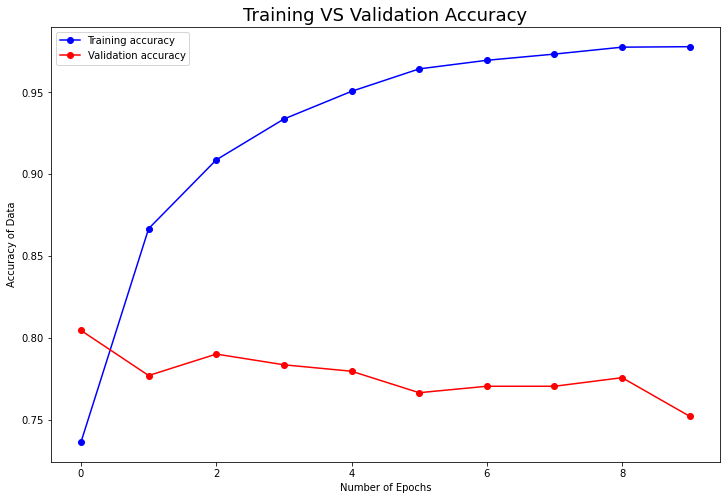

In [151]:
plotAccuracy(history)

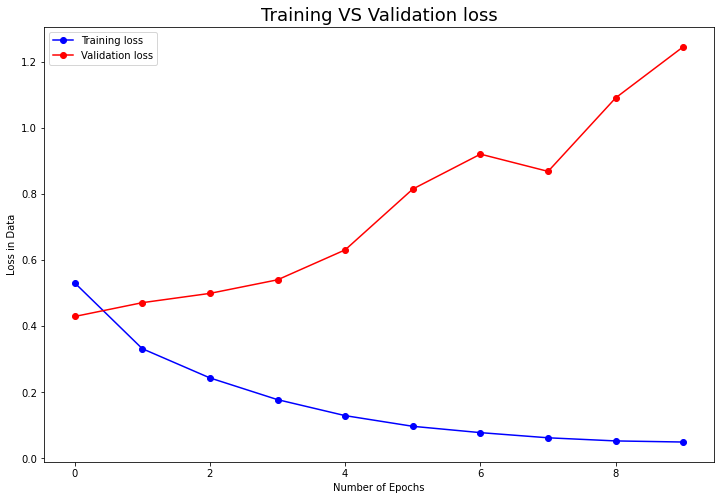

In [152]:
plotLoss(history)

### Second LSTM Model

In [153]:
# reading data from device
df_train = pd.read_csv("train.csv", sep=",", encoding="utf-8")
df_test = pd.read_csv("test.csv", sep=",", encoding="utf-8")

# Clean the data
df_train['text'] = df_train['text'].apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('http')]))
df_train['text'] = df_train['text'].str.replace('[^a-zA-Z]', ' ')
df_train['text'] = df_train['text'].apply(lambda x: x.lower())

# Tokenize the text and convert it into sequences
# The tokenizer object is initialized with the maximum vocabulary size of 10,000 and an out-of-vocabulary (OOV) token '<OOV>'.
# The OOV token is used to replace words that are not in the tokenizer's vocabulary during the tokenization process.

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')

# This method updates the tokenizer's internal vocabulary based on the text data provided and creates word-to-index mappings for the vocabulary.
tokenizer.fit_on_texts(df_train['text'])

# tokenizer.texts_to_sequences(): is a method from Keras that converts the text data in the column into sequences of integers.
# This method maps each word in the text to a unique integer index, based on the frequency of occurrence of the word in the dataset.
sequences = tokenizer.texts_to_sequences(df_train['text'])

# Pad the sequences to ensure they all have the same length
padded_sequences = pad_sequences(sequences, maxlen=50, padding='post', truncating='post')

# Define the LSTM model architecture
model = Sequential()
model.add(Embedding(10000, 256, input_length=50, trainable=True))
model.add(Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)))
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(16, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with appropriate loss and optimizer functions
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, df_train['target'], test_size=0.2)

# Define early stopping callback to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the LSTM model on the training set
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])

# Use the trained LSTM model to make predictions on the test set
test_df = pd.read_csv('test.csv')
df_test['text'] = df_test['text'].apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('http')]))
df_test['text'] = df_test['text'].str.replace('[^a-zA-Z]', ' ')
test_sequences = tokenizer.texts_to_sequences(df_test['text'])
test_padded_sequences = pad_sequences(test_sequences, maxlen=50, padding='post', truncating='post')
predictions = model.predict(test_padded_sequences)

Epoch 1/20
191/191 [==============================] - 82s 354ms/step - loss: 0.5331 - accuracy: 0.7327 - val_loss: 0.4567 - val_accuracy: 0.7984
Epoch 2/20
191/191 [==============================] - 70s 365ms/step - loss: 0.3262 - accuracy: 0.8744 - val_loss: 0.4603 - val_accuracy: 0.8063
Epoch 3/20
191/191 [==============================] - 92s 481ms/step - loss: 0.2241 - accuracy: 0.9205 - val_loss: 0.5425 - val_accuracy: 0.7912
Epoch 4/20
102/102 [==============================] - 16s 139ms/step


In [154]:
model.summary() #summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 256)           2560000   
                                                                 
 bidirectional (Bidirectiona  (None, 50, 256)          394240    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 50, 128)          164352    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 50, 64)           41216     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 32)               10368     
 nal)                                                 

In [155]:
#plot_model(model)

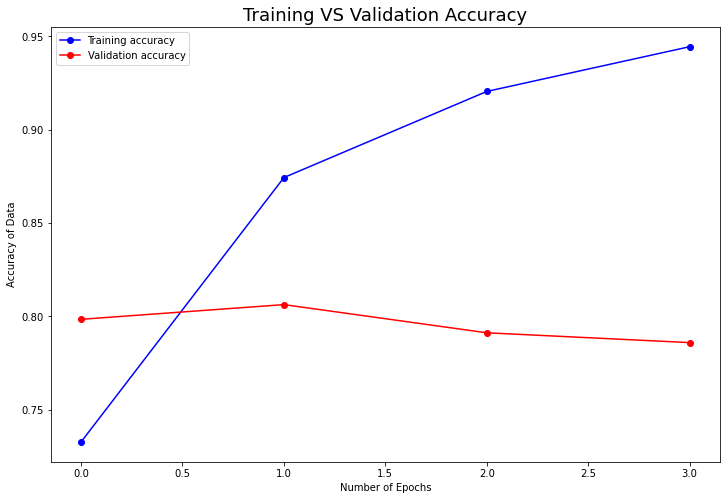

In [156]:
plotAccuracy(history)

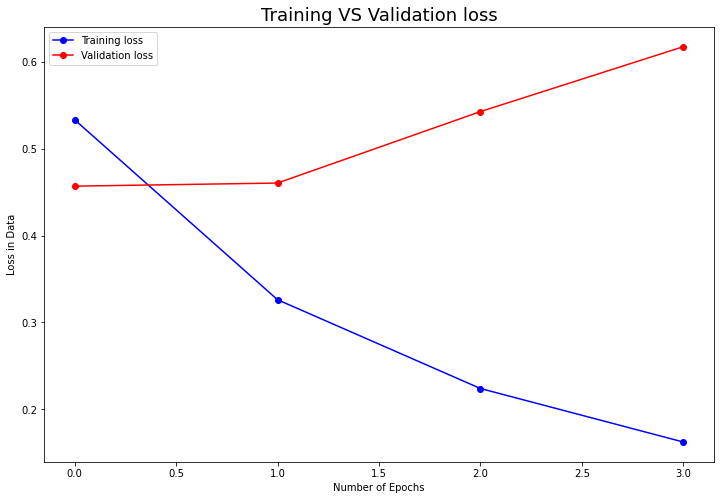

In [157]:
plotLoss(history)

### RNN Model

In [158]:
# Load the dataset
df_train = pd.read_csv("train.csv", sep=",", encoding="utf-8")
df_test = pd.read_csv("test.csv", sep=",", encoding="utf-8")

# Preprocess the text data
def preprocess_text(text):
    # convert to lowercase
    text = text.lower()
    # remove urls
    text = re.sub(r'http\S+', '', text)
    # remove mentions and hashtags
    text = re.sub(r'@\w+|\#','', text)
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # tokenize the text
    words = text.split()
    return ' '.join(words)

df_train['text'] = df_train['text'].apply(preprocess_text)
df_test['text'] = df_test['text'].apply(preprocess_text)

# Convert the text into numerical form

# Converts the preprocessed text data into numerical form using the Tokenizer and pad_sequences functions of Keras. 
# The Tokenizer is used to tokenize the text and convert it to a sequence of integer.

vocab_size = 10000
max_length = 50

# the pad_sequences function is used to pad or truncate the sequences to a fixed length.
# The maximum length of the sequences is set to 50, and the vocabulary size is set to 10,000.

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(df_train['text'])
train_sequences = tokenizer.texts_to_sequences(df_train['text'])

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
test_sequences = tokenizer.texts_to_sequences(df_test['text'])
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')
# padding = 'post': is a parameter used in the pad_sequences() function of Keras. It specifies the position at which to add padding or truncation for the sequences.
# padding = 'post': means that padding will be added to the end of each sequence to make all the sequences the same length. If padding = 'pre', then padding would be added to the beginning of each sequence instead.

# Build an RNN model
embedding_dim = 16
lstm_units = 64

# vocab_size parameter specifies the maximum number of words in the vocabulary that the layer should take into account.
# The embedding_dim parameter specifies the size of the embedding vector for each word in the vocabulary.
# The input_length parameter specifies the maximum length of the input sequences, which is set to 50 in this case.

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    
    # Bidirectional LSTM layer using the Keras API.
    # This layer is used to process the sequences of embeddings generated by the Embedding layer in both forward and backward directions.
    # lstm_units parameter specifies the number of LSTM units in the layer, which is set to 64.
    # The return_sequences = True : parameter specifies that the layer should return sequences of outputs for each time step in the input sequence, rather than just the final output.
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_units, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_units)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the RNN model
num_epochs = 10
validation_split = 0.2


history = model.fit(train_padded, df_train['target'], epochs=num_epochs, validation_split=validation_split)

Epoch 1/10
191/191 [==============================] - 22s 86ms/step - loss: 0.5709 - accuracy: 0.7076 - val_loss: 0.4762 - val_accuracy: 0.7814
Epoch 2/10
191/191 [==============================] - 15s 80ms/step - loss: 0.3620 - accuracy: 0.8571 - val_loss: 0.5115 - val_accuracy: 0.7774
Epoch 3/10
191/191 [==============================] - 15s 79ms/step - loss: 0.2589 - accuracy: 0.9049 - val_loss: 0.5439 - val_accuracy: 0.7636
Epoch 4/10
191/191 [==============================] - 16s 81ms/step - loss: 0.1969 - accuracy: 0.9325 - val_loss: 0.6132 - val_accuracy: 0.7617
Epoch 5/10
191/191 [==============================] - 15s 79ms/step - loss: 0.1589 - accuracy: 0.9465 - val_loss: 0.6153 - val_accuracy: 0.7426
Epoch 6/10
191/191 [==============================] - 15s 78ms/step - loss: 0.1345 - accuracy: 0.9567 - val_loss: 0.7970 - val_accuracy: 0.7439
Epoch 7/10
191/191 [==============================] - 15s 79ms/step - loss: 0.1118 - accuracy: 0.9650 - val_loss: 0.8175 - val_accuracy:

In [159]:
model.summary() #summary

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 16)            160000    
                                                                 
 bidirectional_4 (Bidirectio  (None, 50, 128)          41472     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [160]:
#plot_model(model)

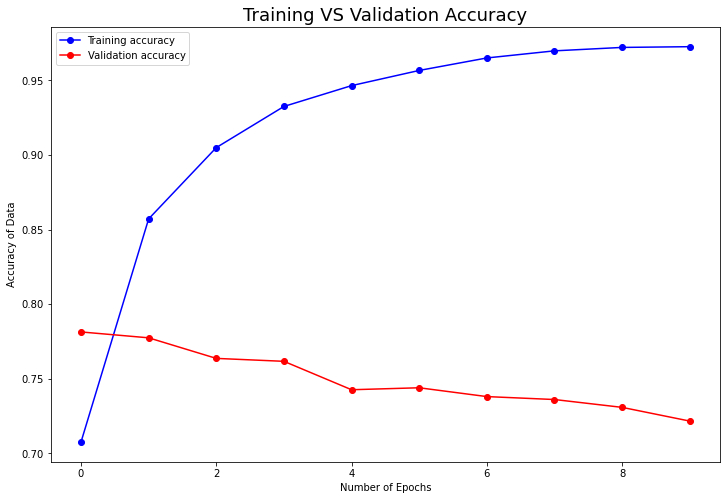

In [161]:
plotAccuracy(history)

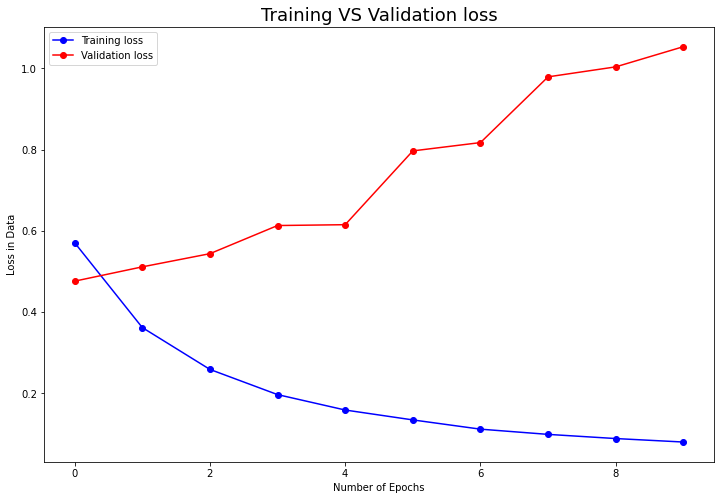

In [162]:
plotLoss(history)

### Making a Class Combining all Text Preprocessing we used in this dataset

In [163]:
# Libraries Used in Text Preprocessing
import re
import string
import contractions
from bs4 import BeautifulSoup
from unidecode import unidecode
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from spellchecker import SpellChecker
import itertools

class TextPreprocessor:
    
    def __init__(self):
        # Constructor Function
        self.stopWords = set(stopwords.words("english"))
        self.stemmer = PorterStemmer()
        self.lemmatizer = WordNetLemmatizer()
        self.spell = SpellChecker()
        self.sia = SentimentIntensityAnalyzer()
        # Load the small English language model in spaCy
        self.nlp = spacy.load('en_core_web_sm')
        # Define a list of known compound words to remove
        compound_words = ['ice cream', 'new york', 'high school']
        
        abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    'hwy': 'highway',
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rip": "rest in peace",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    'w/e': 'whatever',
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}
        
    # Lowercase Function
    def toLowerCase(self, text):
        text = text.str.lower()
        # text = text.lower()
        return text
    
    # Tokenizer Function ( words in text )
    def textTokenizer(self, text):
        tokens = word_tokenize(text)
        return tokens
    
    # Vocabularies Function ( words in text without duplicates )
    def textVocabs(self, text):
        tokens = word_tokenize(text)
        vocabs = set(tokens)
        return vocabs
    
    # HTML Removal Function
    def htmlRemoval(self, text):
        soup = BeautifulSoup(self.text)
        text = soup.get_text()
        return text

    # Contractions Function
    def fixingContractions(self, text):
        text = text.apply(contractions.fix)
        return text
    
    # Mentions Removal Function
    def mentionsRemoval(self, text):
        pattern = re.compile(r"@\w+")
        text = re.sub(pattern, "", text)
        return text

    # URL Removal Function
    def urlRemoval(self, text):
        pattern = re.compile(r"https?://(www\.)?(\w+)(\.\w+)(/\w*)?")
        text = re.sub(pattern, "", text)
        return text

    # Email Removal Function
    def emailRemoval(self, text):
        pattern = re.compile(r"[\w\.-]+@[\w\.-]+\.\w+")
        text = re.sub(pattern, "", text)
        return text

    # Diacritics Handler Function
    def diacriticsHandler(self, text):
        text = unidecode(text)
        return text

    # Punctuations Removal Function
    def punctuationsRemoval(self, text):
        text = re.sub("[%s]" % re.escape(string.punctuation), " ",text)
        # text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
        # text = text.strip()
        return text
    
    # Unicode Characters Removal Function
    def unicodeCharactersRemoval(self, text):
        text = text.encode("ascii", "ignore").decode()
        return text
    
    # Digits Removal Function
    def digitsRemoval(self, text):
        pattern = re.compile("\w*\d+\w*")
        # text = re.sub(r'\d+', '', text)  # remove digits
        text = re.sub(pattern, "",text)
        return text
    
    # Currency Function
    def moneyAndPercentageHandler(self, text):
        text = re.sub(r"(₹|\$|£|€|¥)\s?\d+(\.\d+)?", "money amount",text)
        text = re.sub(r"\d+(\.\d+)?\s?%", "percentage",text)
        return text
    
    # Stopwords Removal Function
    def stopwordsRemoval(self, text):
        stopWords = set(stopwords.words('english'))
        return " ".join([word for word in str(text).split() if word not in stopWords])

    # Extra White Space Removal Function
    def extraSpaceRemoval(self, text):
        text = re.sub(" +", " ", text).strip()
        return text
    
    # lemmatization Function
    def textLemmatizer(self, text):
        words = [lemmatizer.lemmatize(word) for word in text.split()]
        text = " ".join(words)
        return text
    
    # Stemming Removal Function
    def textStemming(self, text):
        words = [self.stemmer.stem(word) for word in text.split()]
        text = " ".join(words)
        return text
    
    # Change an abbreviation to its true word
    def fixAbbrev(self, text):
        return ' '.join([abbreviations[word.lower()] if (word.lower() in abbreviations.keys()) else word for word in text.split()])

    # Remove text in brackets
    def removeBrackets(self, text):
        return re.sub(r'\[.*?\]', '', text)  

    # Filter out words with too few characters (2 by default)
    def filterWords(self, text):
        return ' '.join([word for word in text.split() if len(word) > 2])

    # Replace <3 with LOVE
    def transcriptionLove(self, text):
        love = re.compile(r'<3')
        return love.sub(r'love', text)

    # Replace :D with very happy
    def transcriptionVeryHappy(self, text):
        veryhappy = re.compile(r':D')
        return veryhappy.sub(r'very happy', text)

    # Replace XD with funny
    def transcriptionFunny(self, text):
        funny = re.compile(r'XD')
        return funny.sub(r'funny', text)

    def replaceSymbols(self, text):
         # Replace symbols
        text = text.replace(r'&amp;?', r'and')
        text = text.replace(r'&lt;', r'lower than')
        text = text.replace(r'&gt;', r'greater than')
        text = text.replace('&amp;', " and ")
        return text

    def removeProperNouns(self, text):
        tagged_text = nltk.pos_tag(nltk.word_tokenize(text))
        no_proper_nouns = [word for word, tag in tagged_text if tag != 'NNP' and tag != 'NNPS']
        return ' '.join(no_proper_nouns)

    # Define a function to remove compound words
    def removeCompoundWords(self, text):
        doc = nlp(text)
        no_compounds = [token.text for token in doc if token.dep_ != 'compound']
        filtered = [word for word in no_compounds if word not in compound_words]
        return ' '.join(filtered)
    
    # function to remove text with high sentiment scores
    def removeFigurativeLanguage(self, text):
        sentiment = sia.polarity_scores(text)
        # values range from -1 to 1 
        if sentiment['compound'] > 0.5:
            return ''
        else:
            return text

    def correctSpellings(self, text):
        corrected_text = []
        misspelled_words = spell.unknown(text.split())
        print(misspelled_words)
        for word in text.split():
            if word in misspelled_words:
                corrected_text.append(spell.correction(word))
            else:
                corrected_text.append(word)
        return " ".join(corrected_text)
    
    def removeEmoji(self, text):
        emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)

### Making a Function to predict the class of any text

In [148]:
def predictWord(text):
    # Apply binary encoding to the text data
    vectorizerText = vectorizer.transform([text])
    y_pred_LR = LR.predict(vectorizerText)
    print("prediction is :", "Disaster Tweet" if y_pred_LR[0] else "Normal Tweet")

text1= "thousands of demonstrators have marched through london to protest the war in iraq and demand the with draw"
predictWord(text1)

prediction is : Normal Tweet


### Hope You Liked This Notebook untill now .... Thank You and See you in Other Datasets.